In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Rain_data.csv')

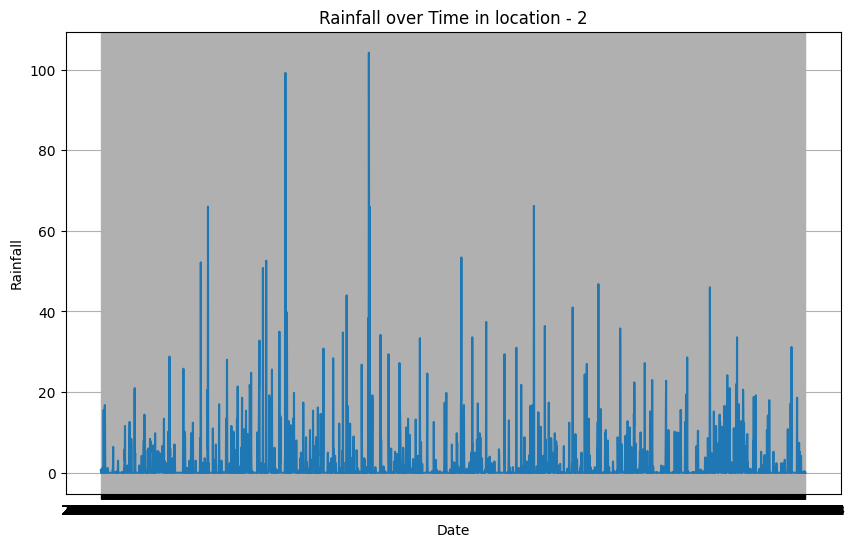

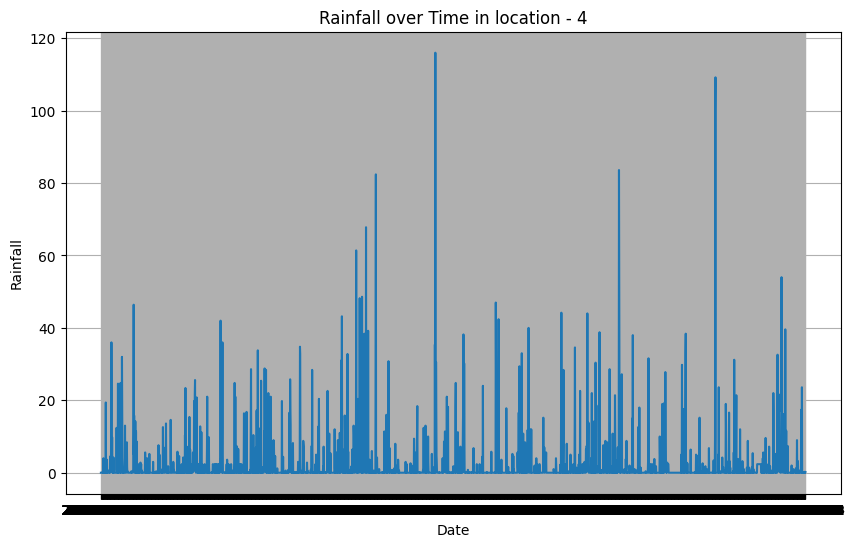

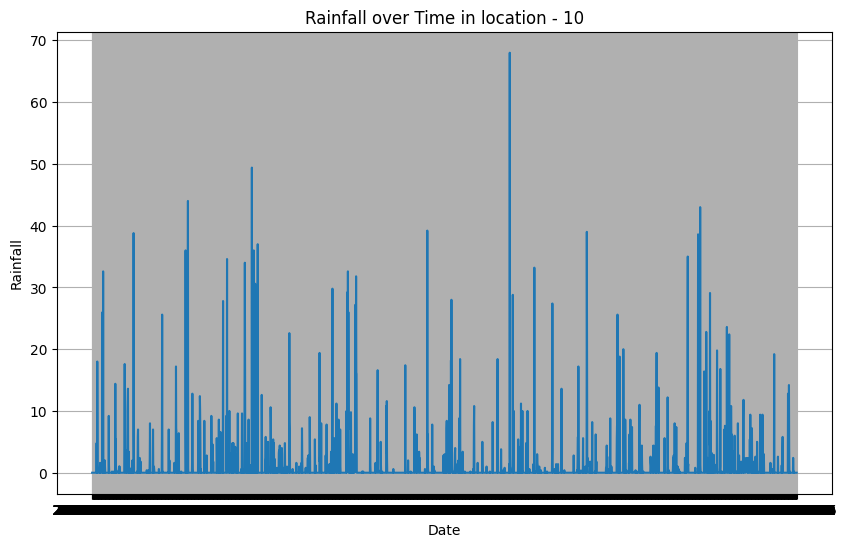

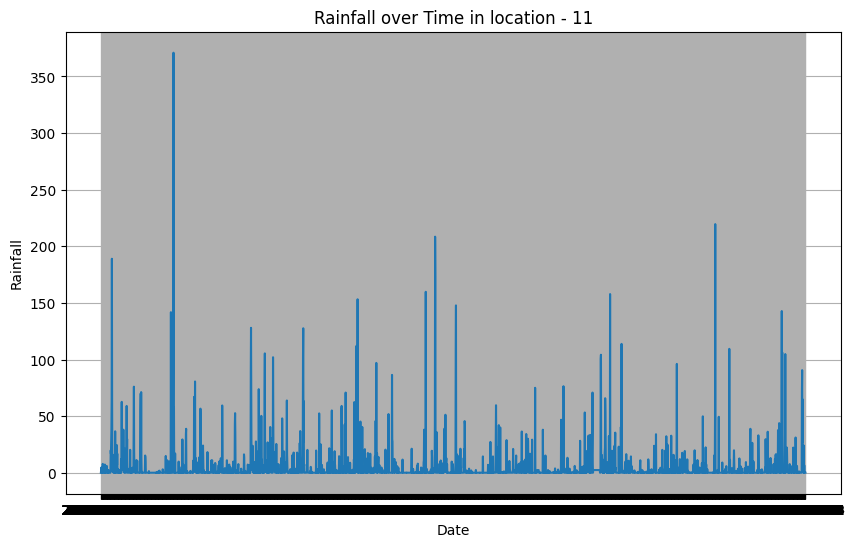

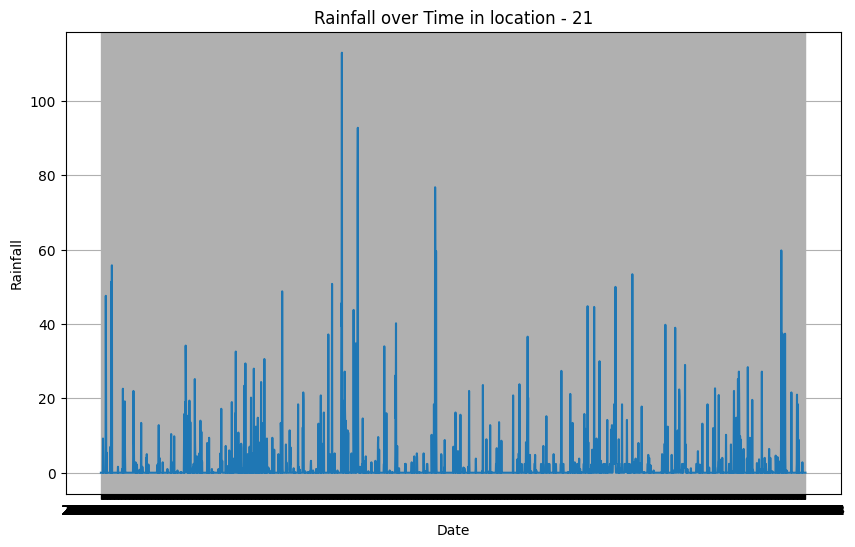

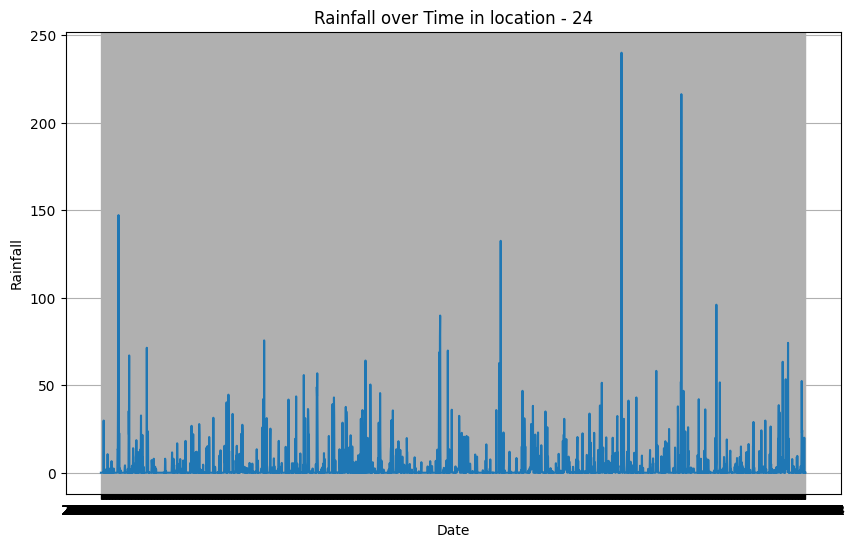

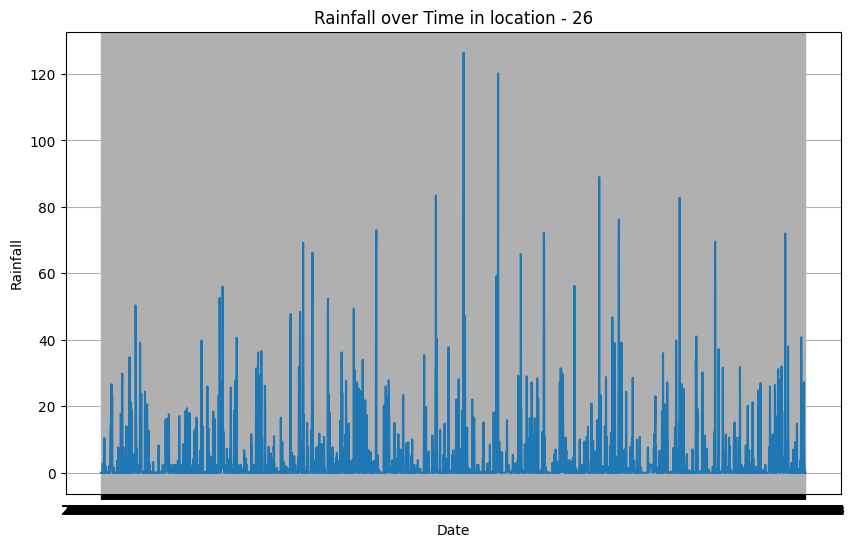

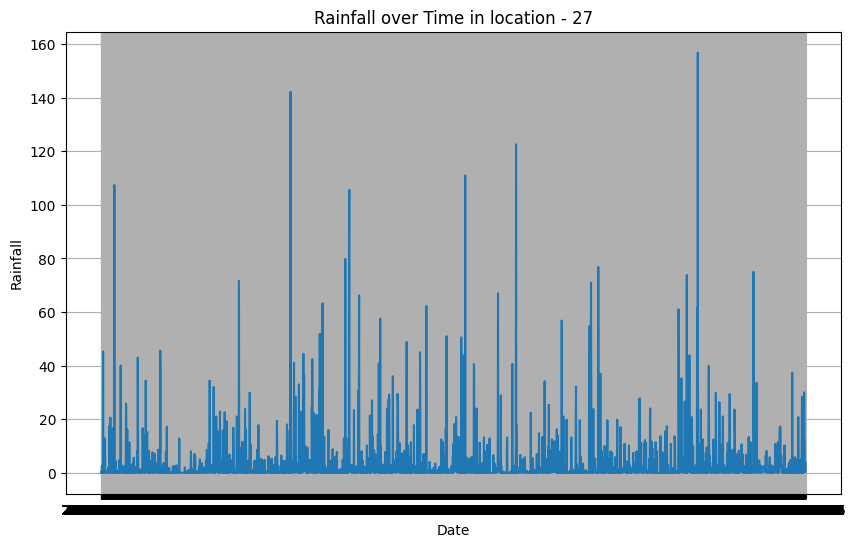

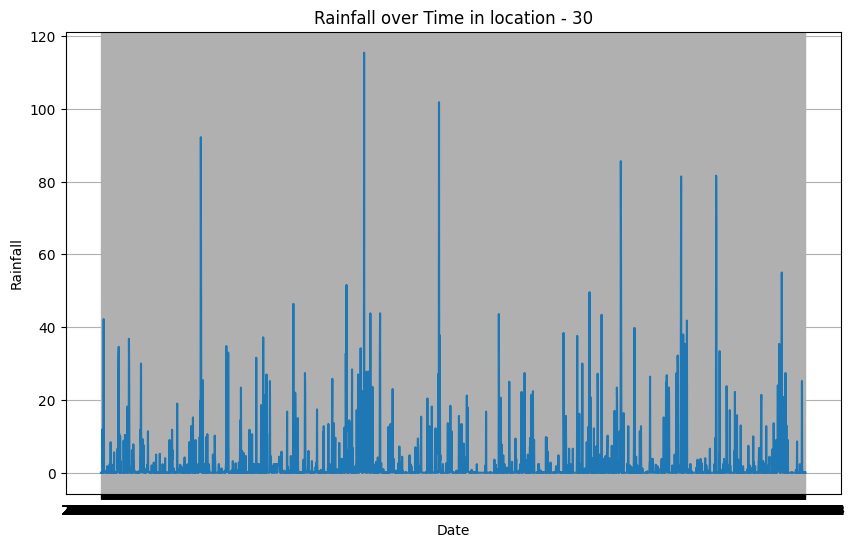

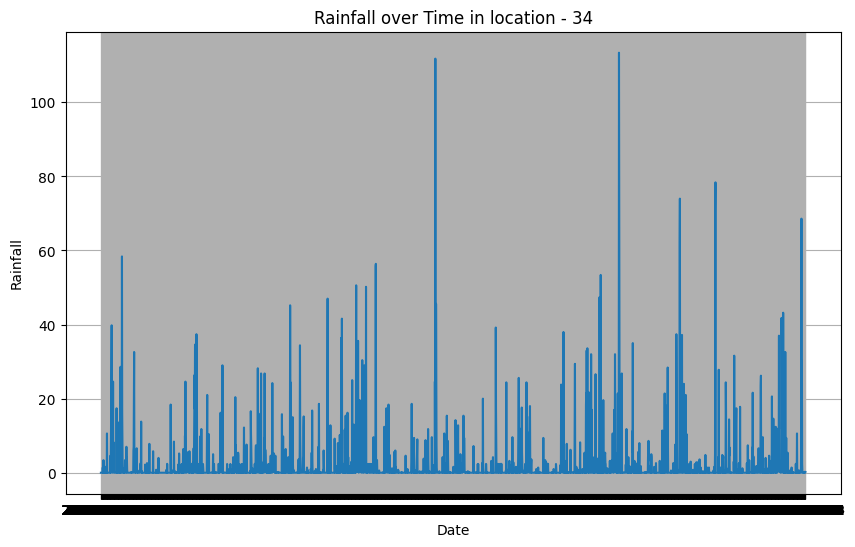

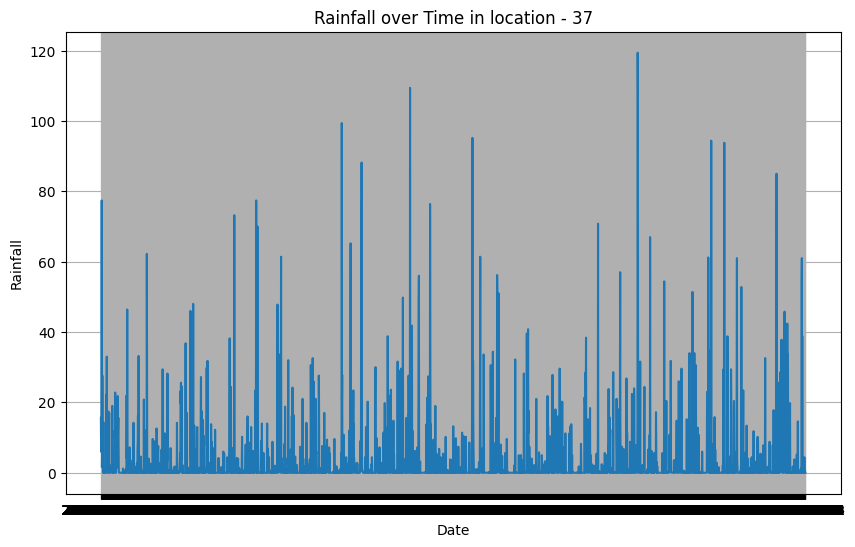

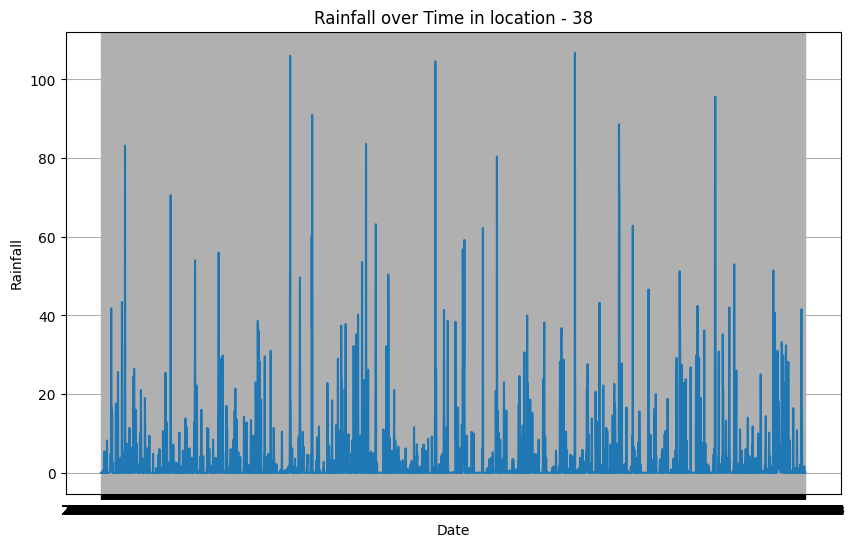

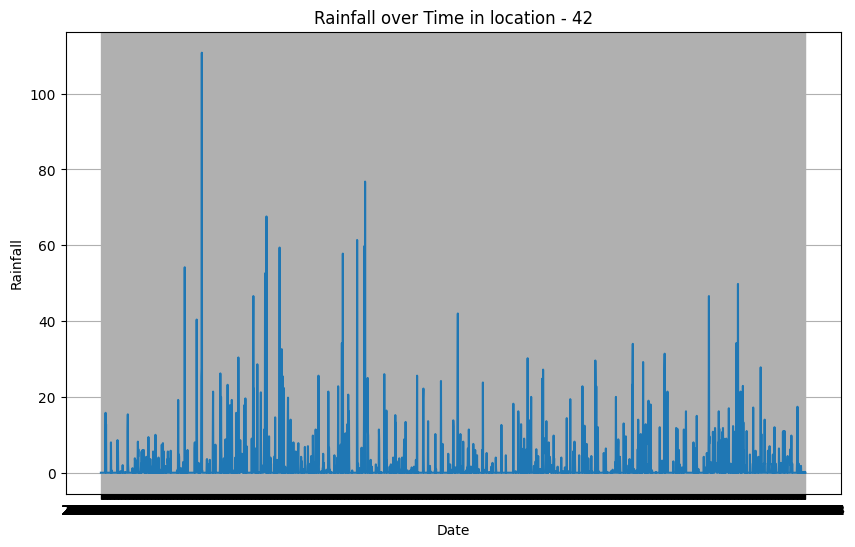

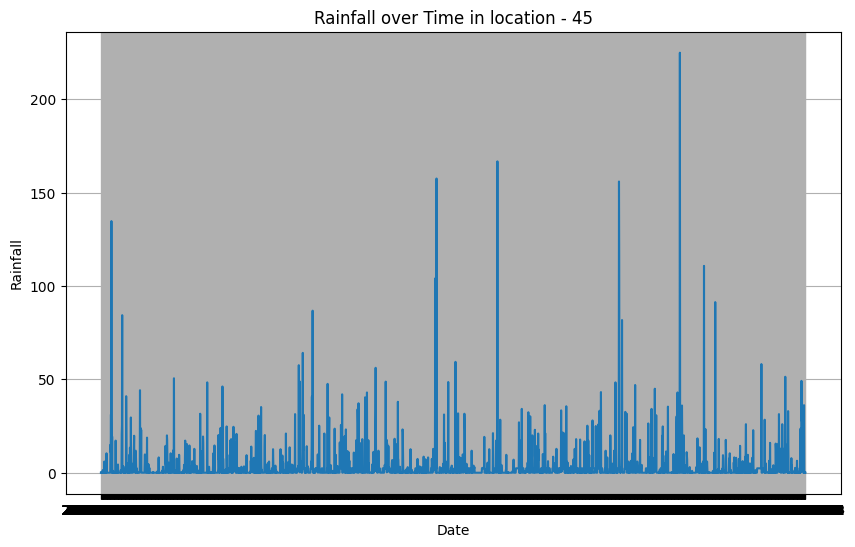

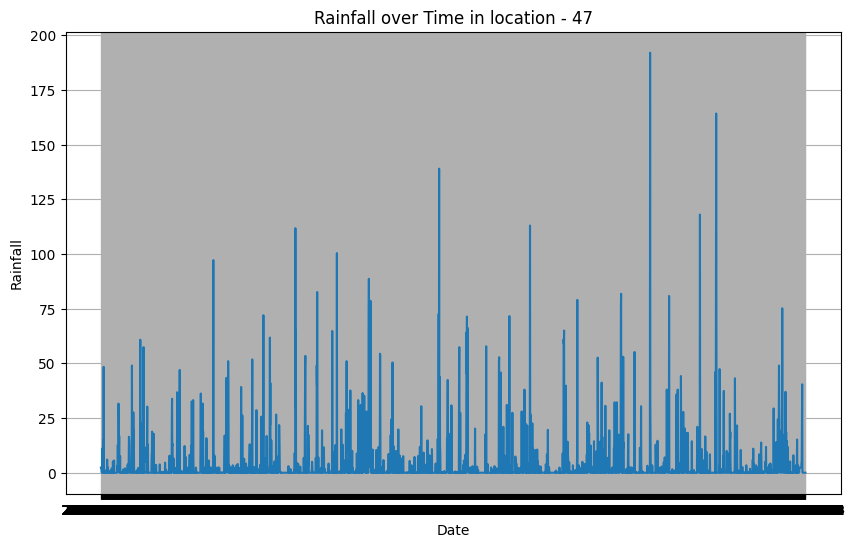

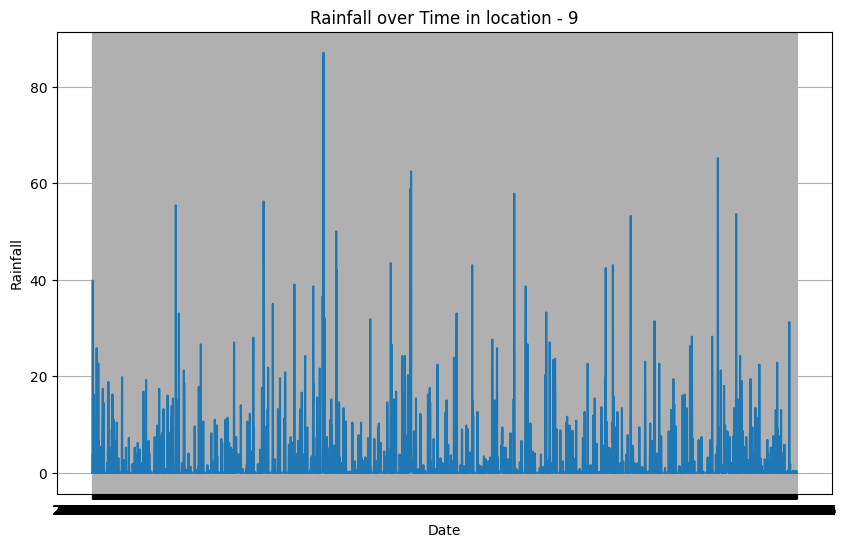

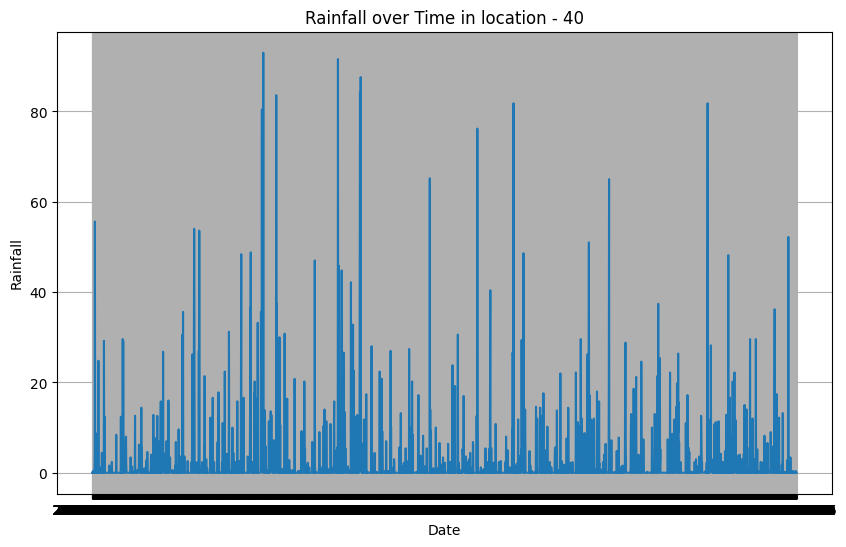

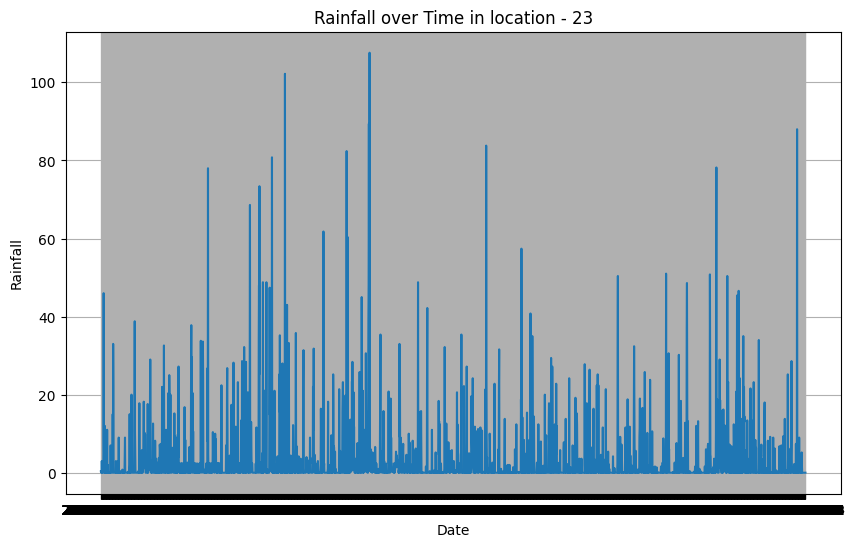

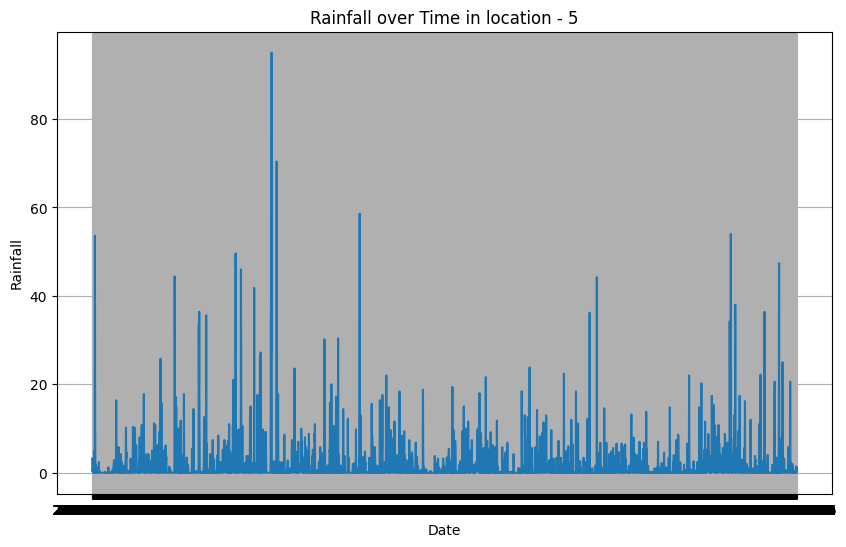

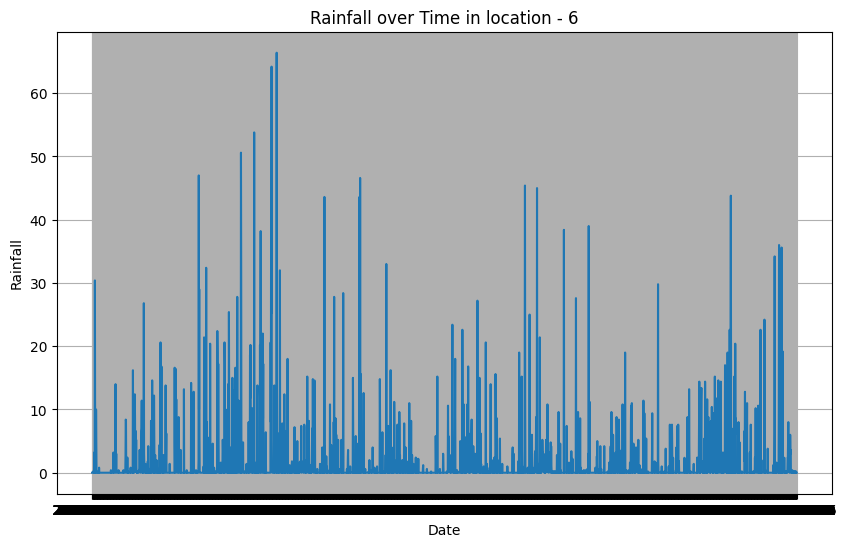

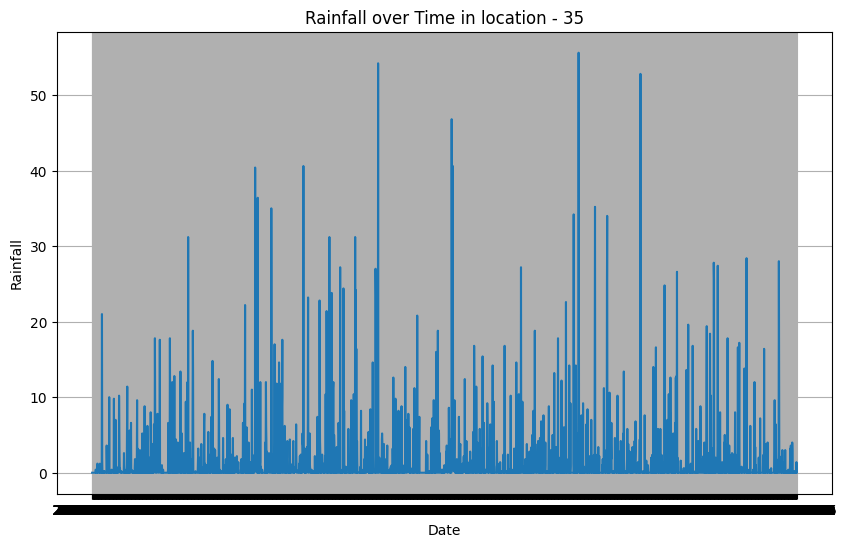

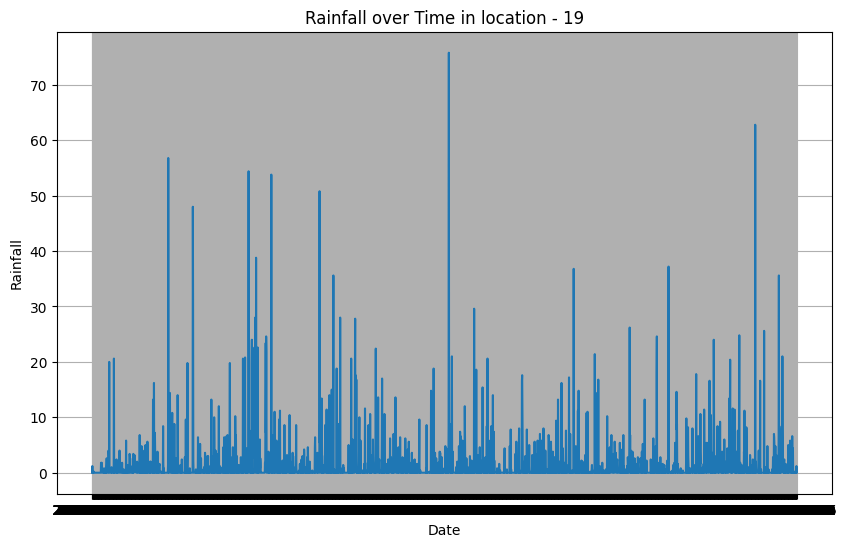

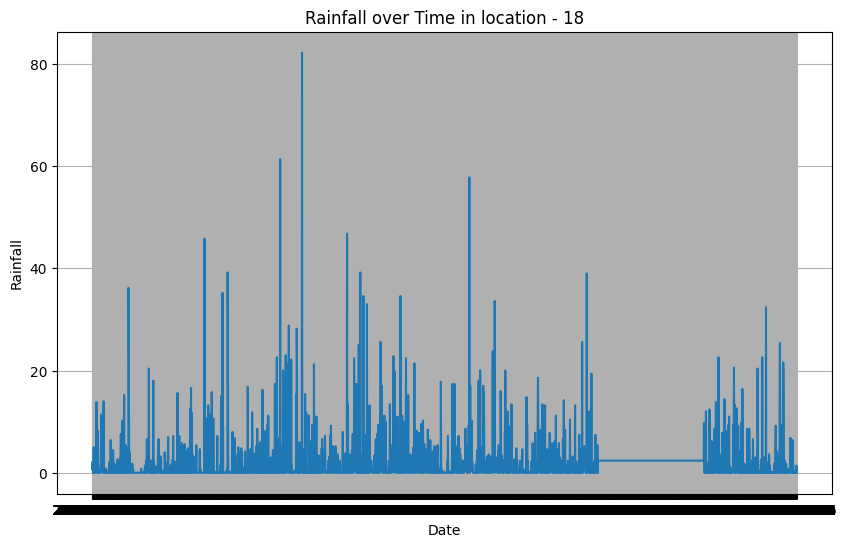

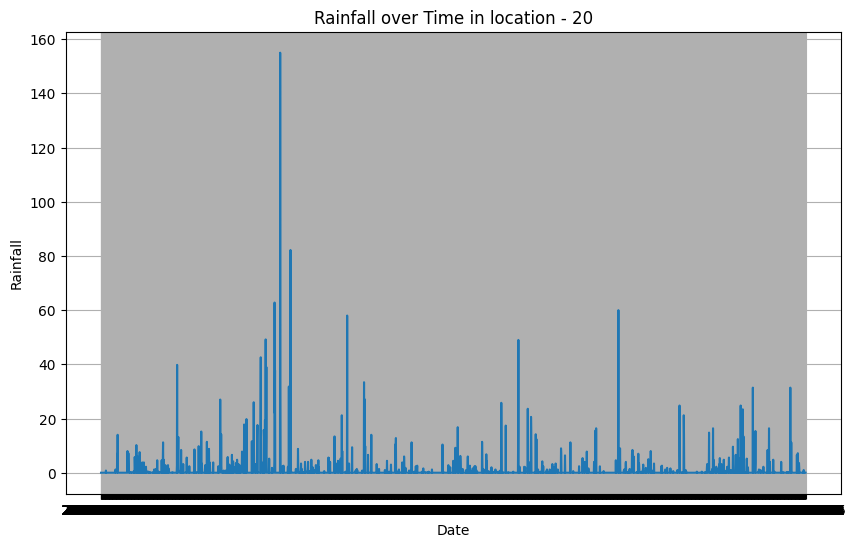

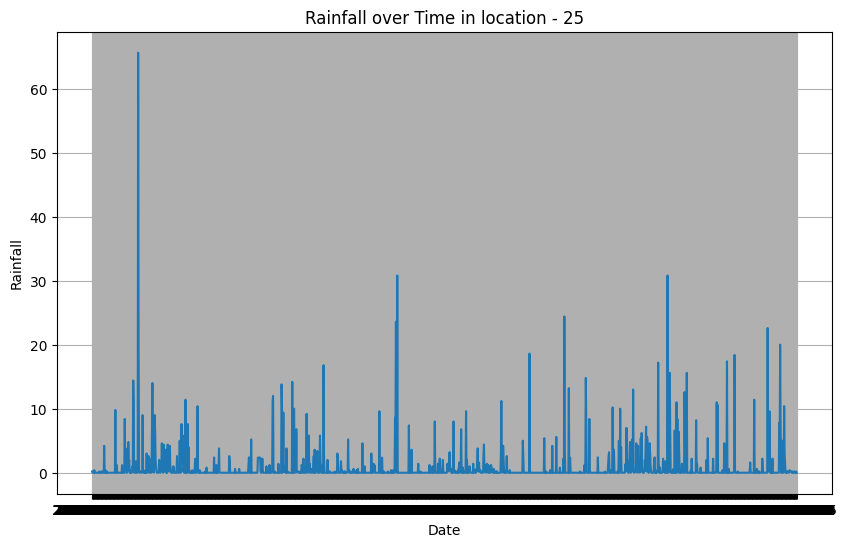

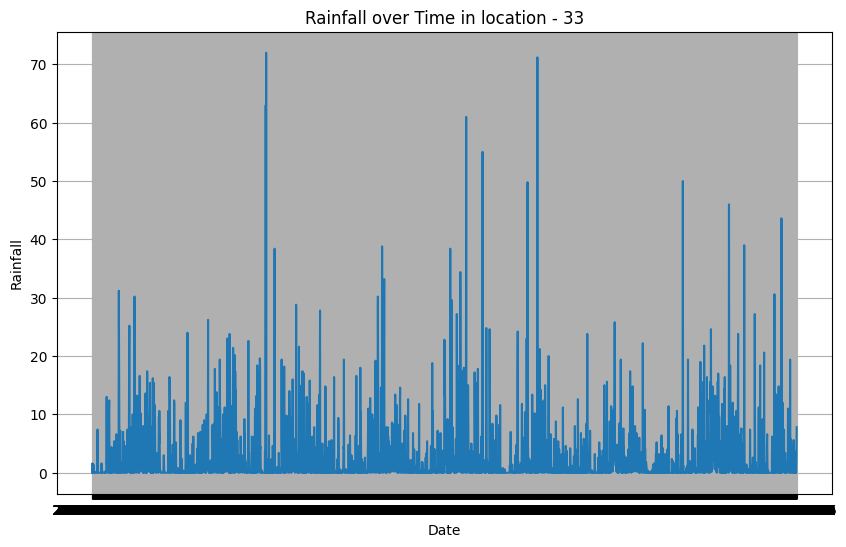

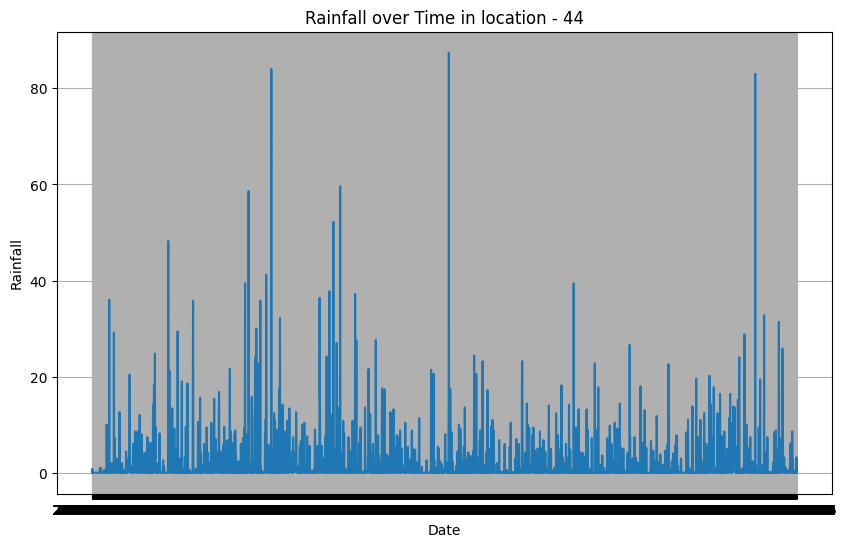

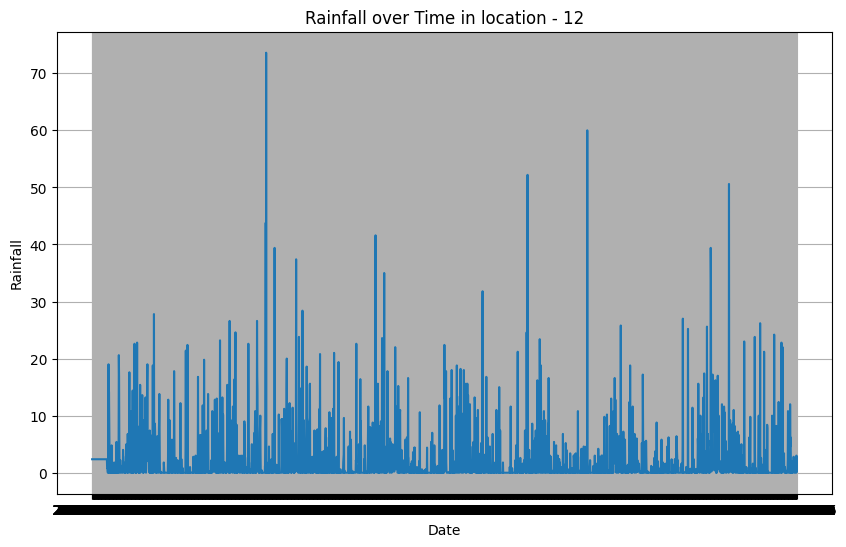

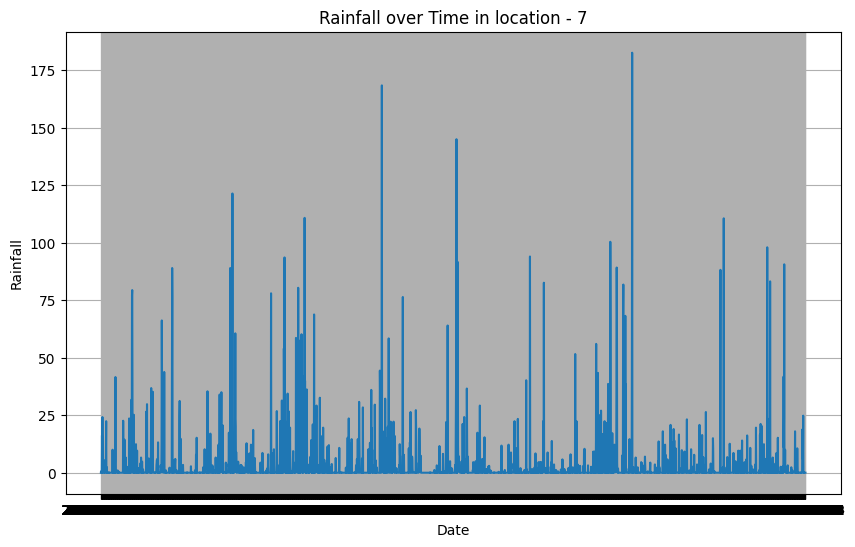

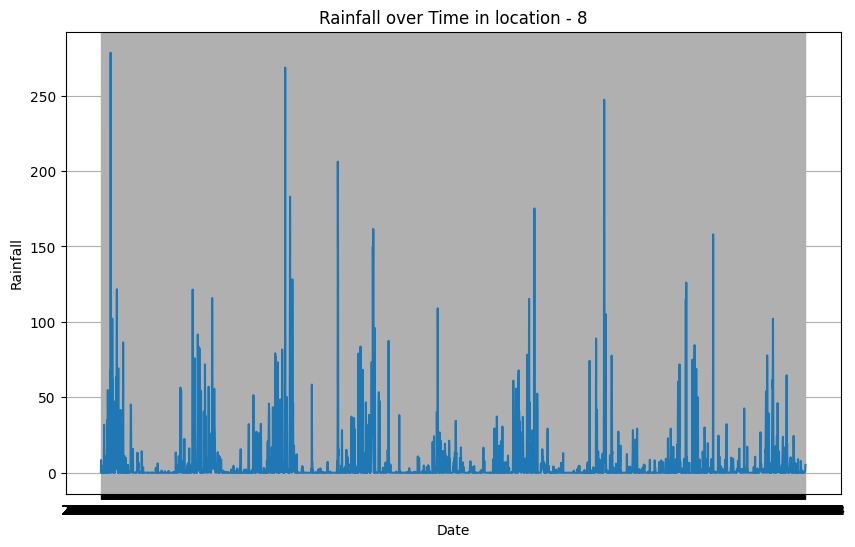

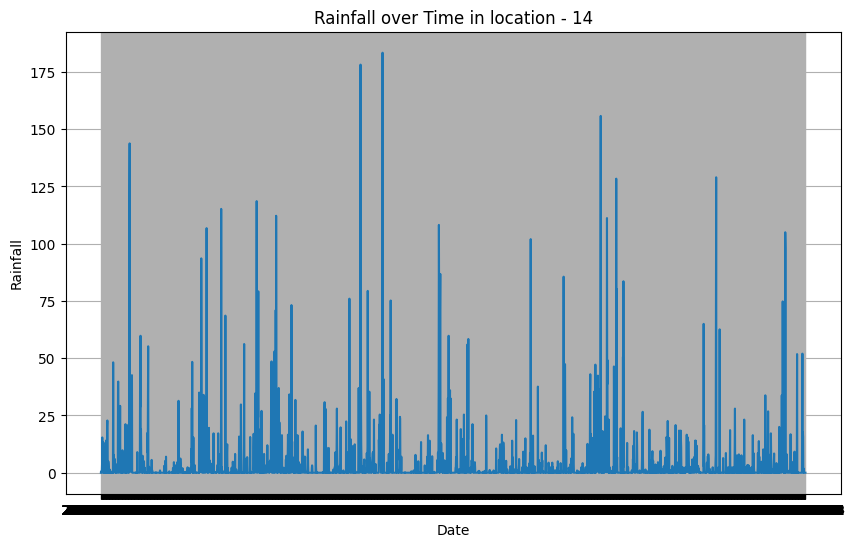

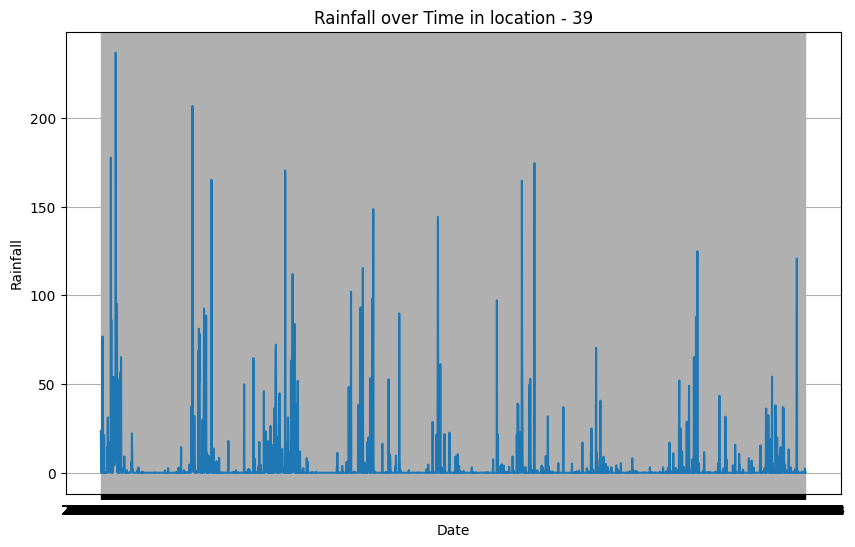

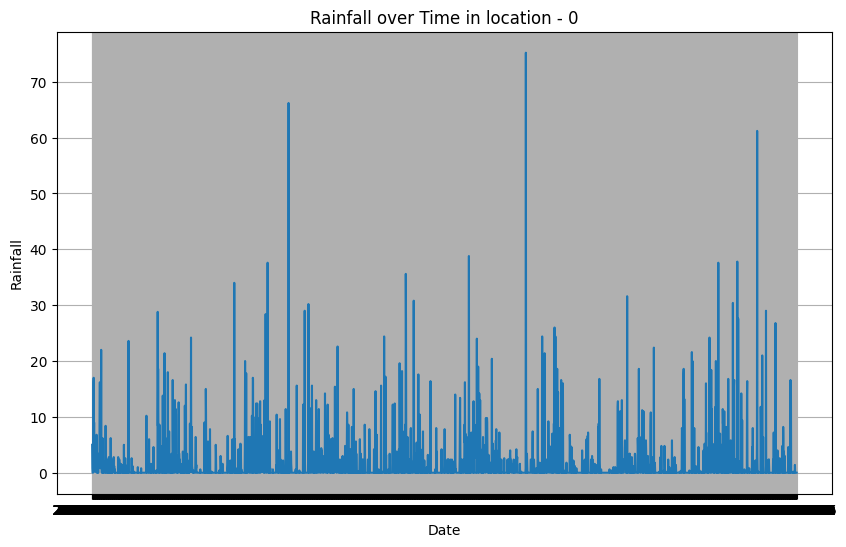

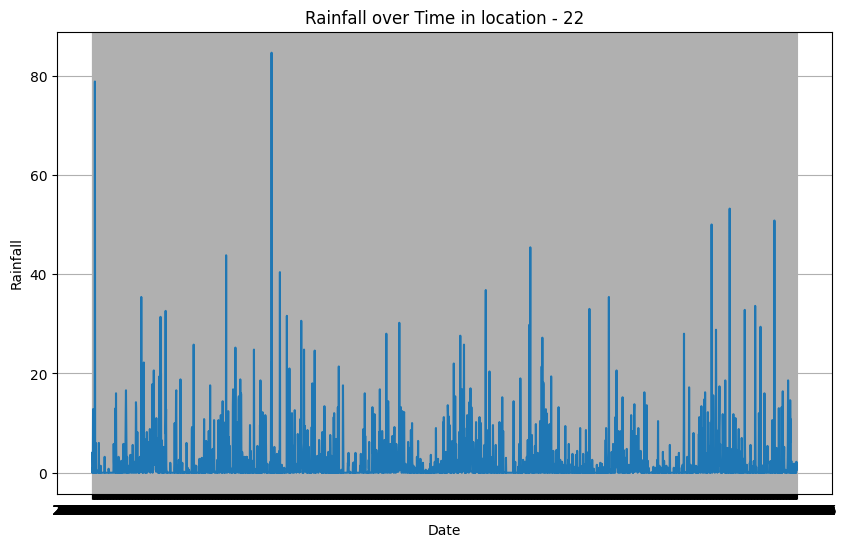

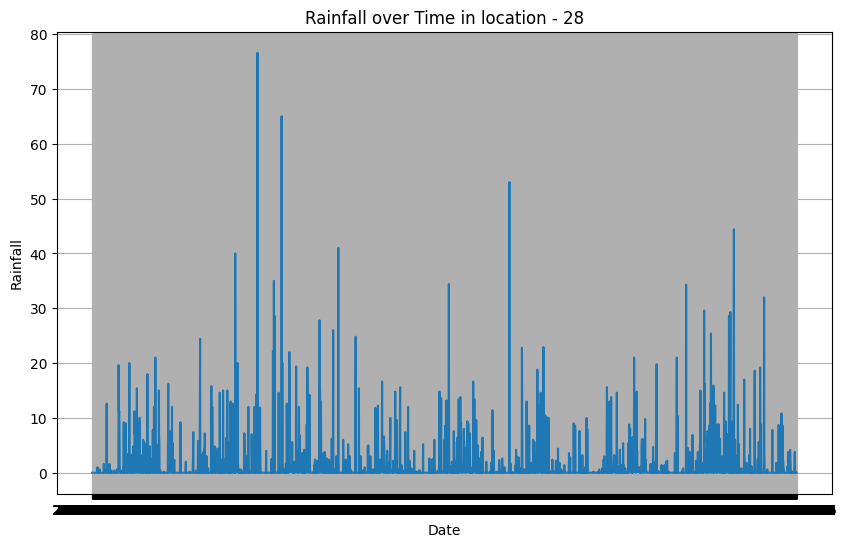

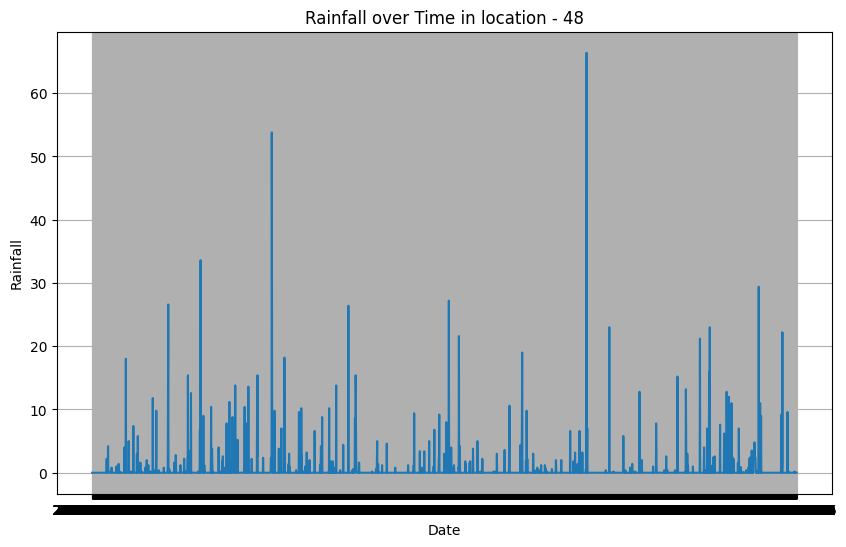

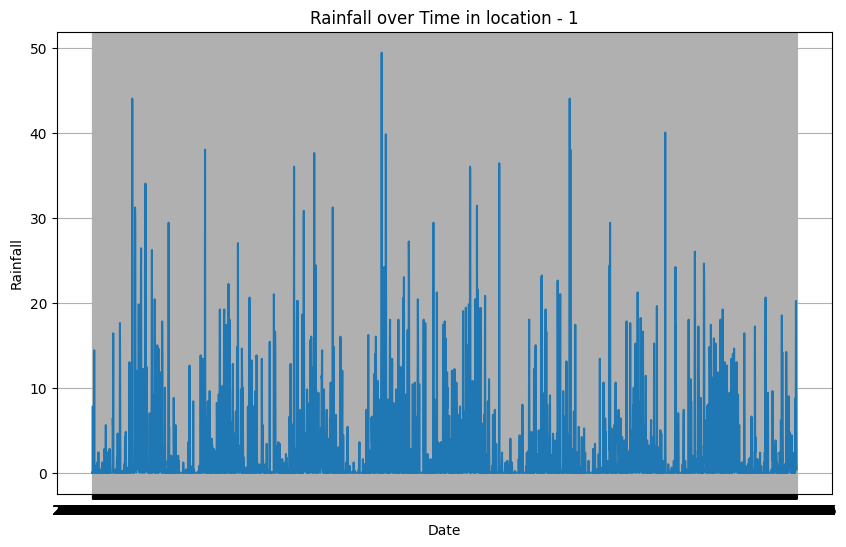

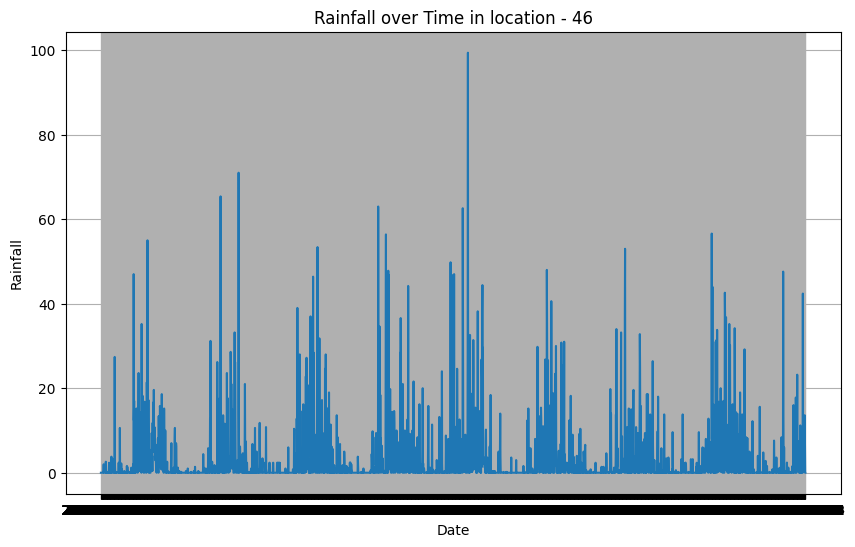

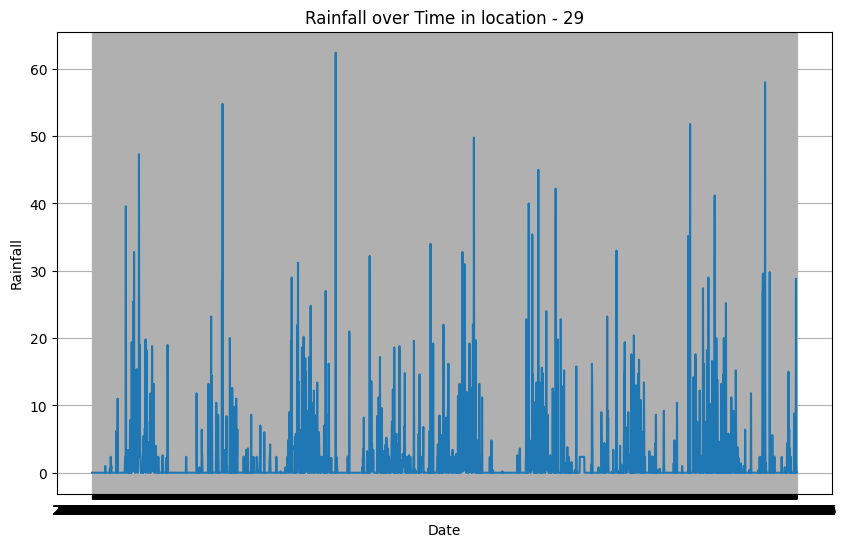

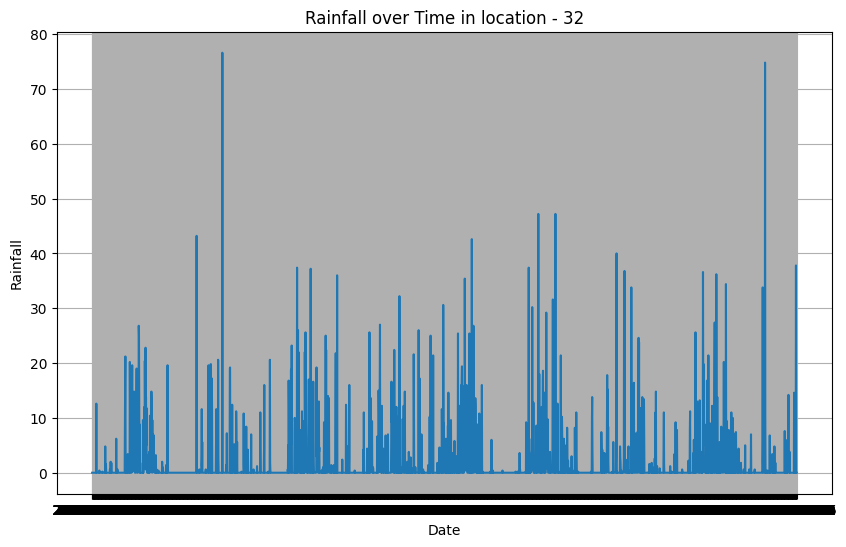

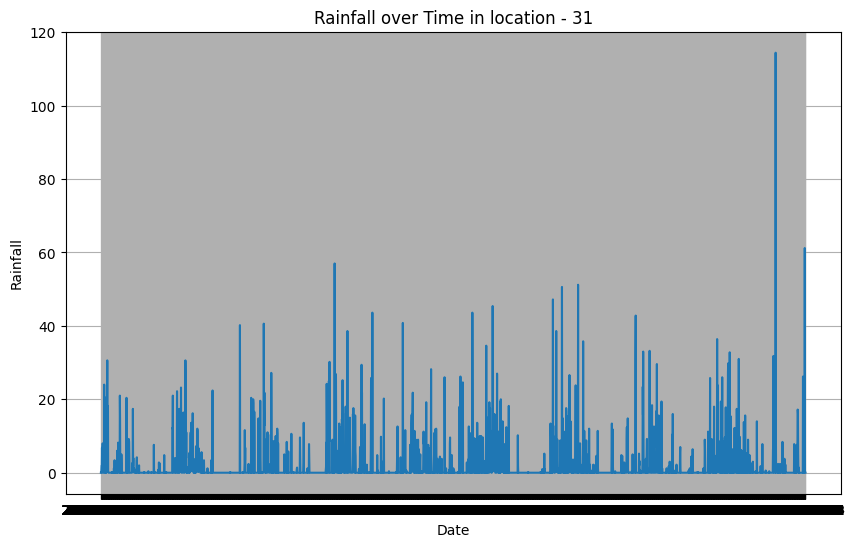

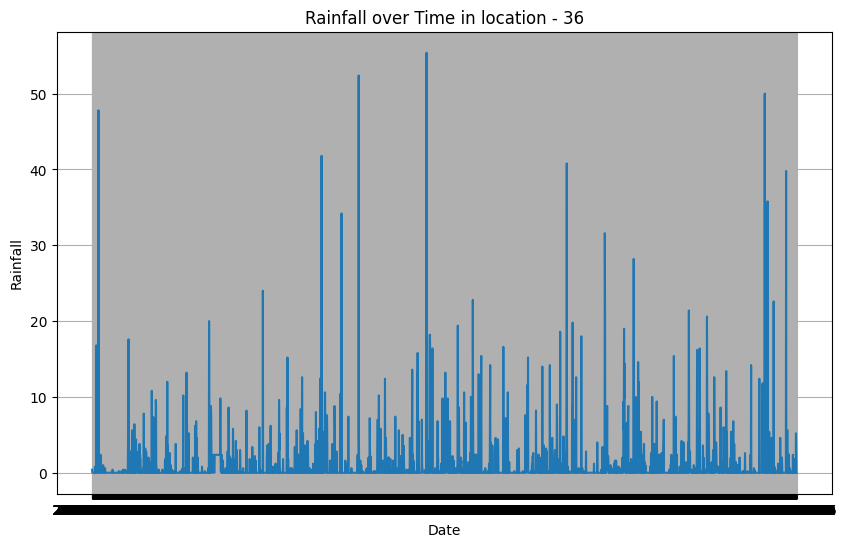

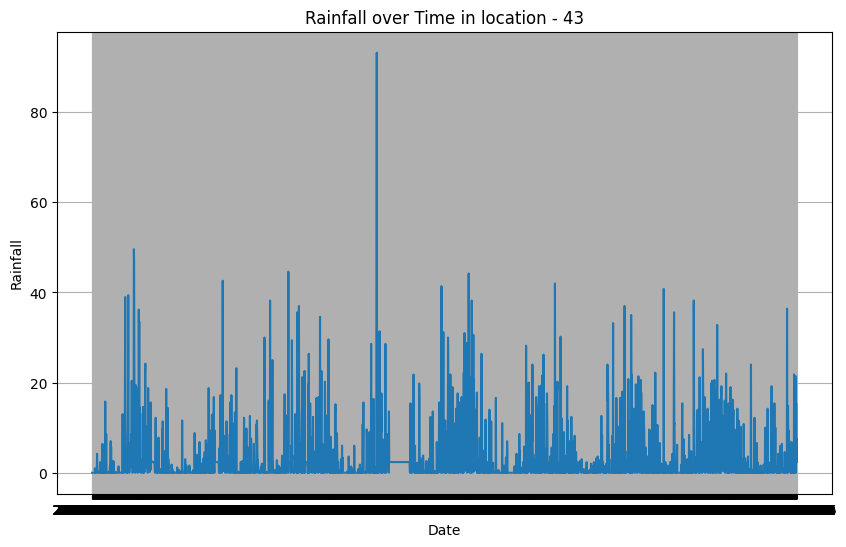

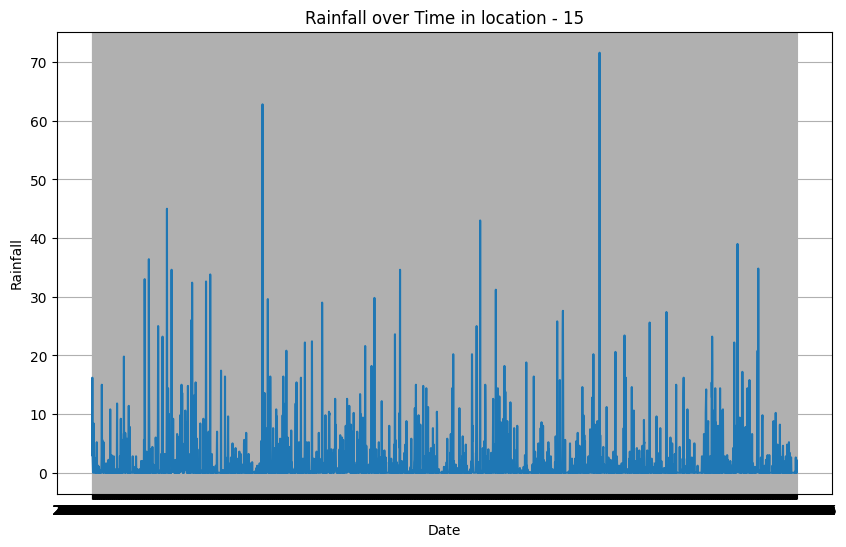

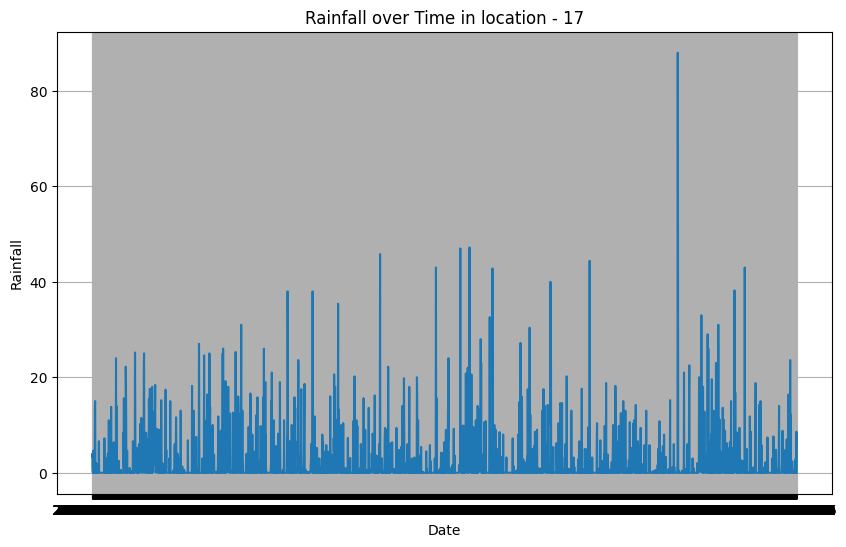

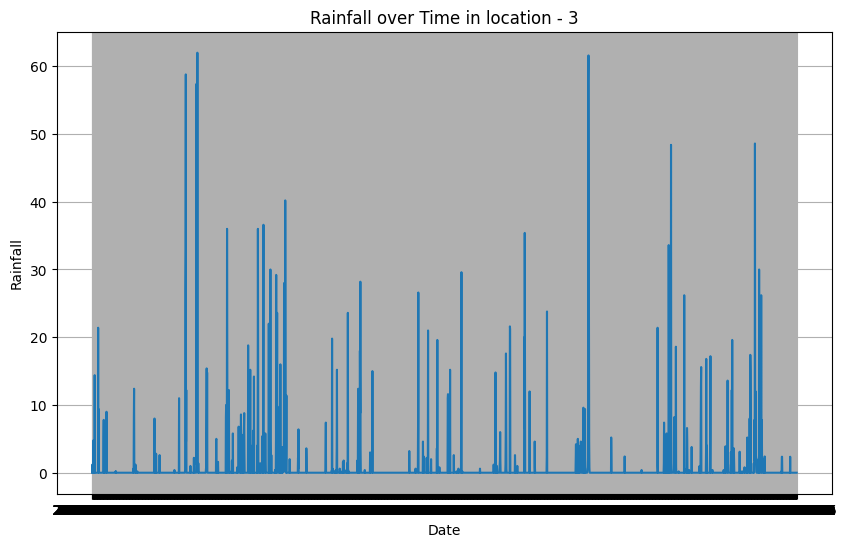

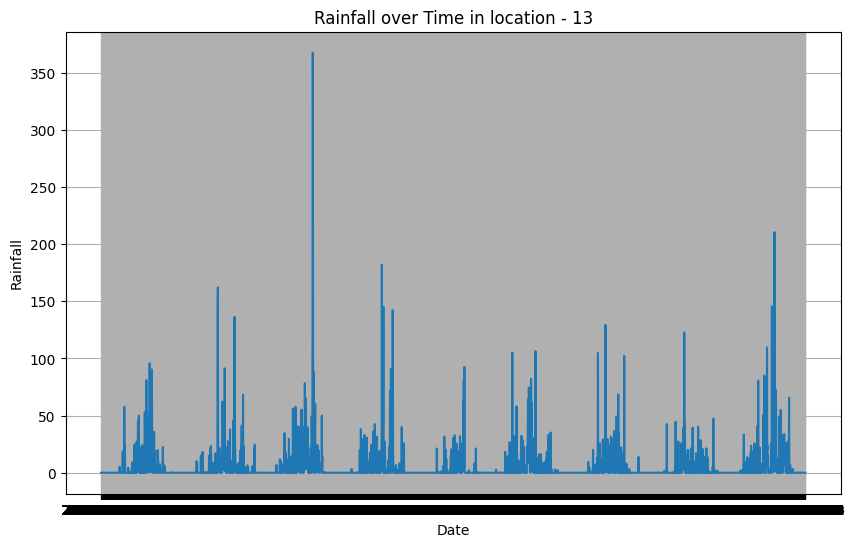

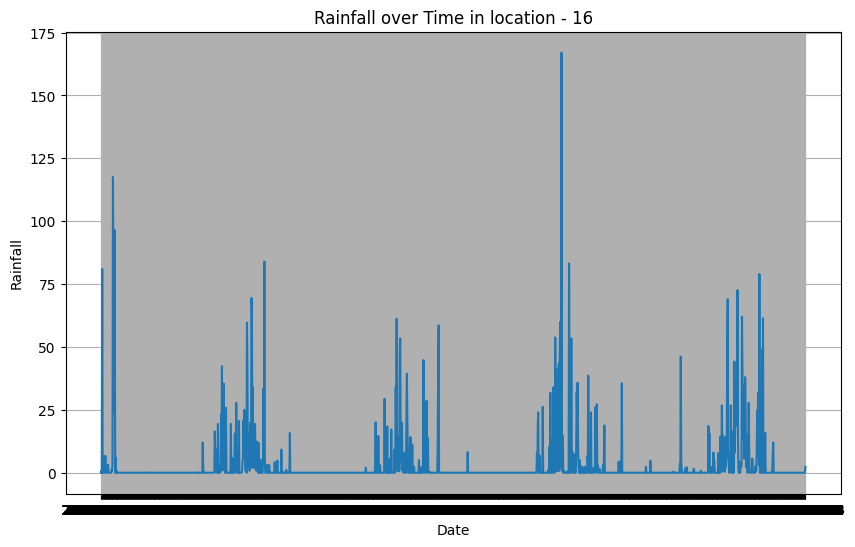

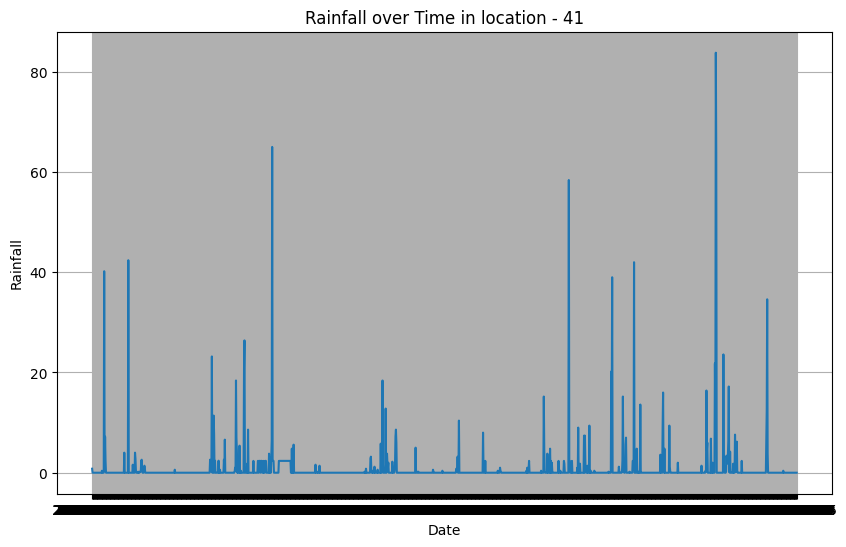

In [3]:

# Set Date as the index (if not done already)
df.set_index('Date', inplace=True)


# Get the unique locations
locations = df['Location'].unique()

# Loop through each location and plot rainfall over time
for location in locations:
    plt.figure(figsize=(10, 6))

    # Filter the data for each location
    location_data = df[df['Location'] == location]

    # Plot Rainfall for the current location
    plt.plot(location_data.index, location_data['Rainfall'], label=location)
    plt.title(f'Rainfall over Time in location - {location}')
    plt.xlabel('Date')
    plt.ylabel('Rainfall')
    plt.grid(True)

    # Show the graph
    plt.show()


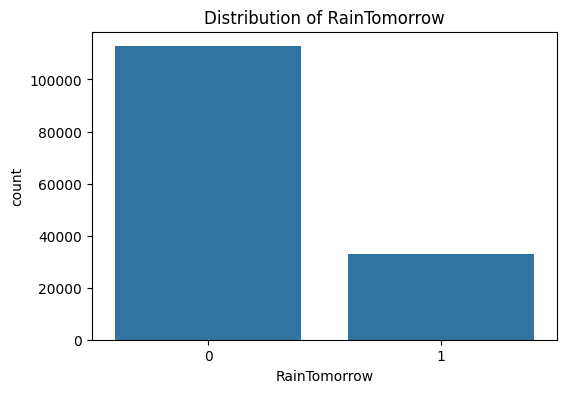

In [5]:
# Plot the distribution of 'RainTomorrow'
plt.figure(figsize=(6, 4))
sns.countplot(x='RainTomorrow', data=df)
plt.title('Distribution of RainTomorrow')
plt.show()

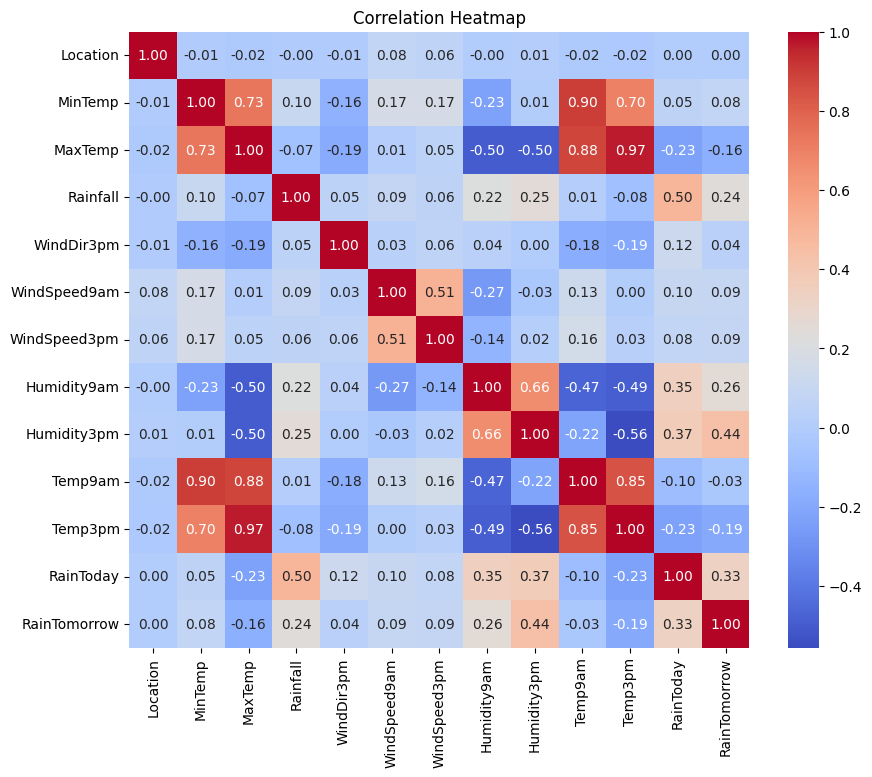

In [7]:
# Plot a heatmap for correlations between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

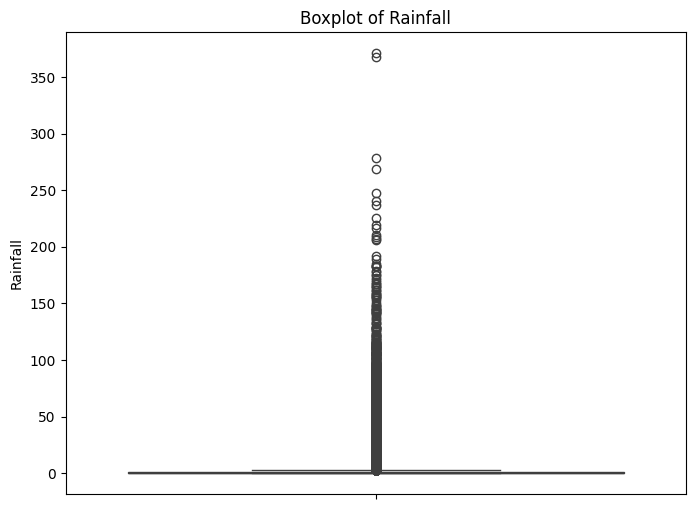

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='Rainfall', data=df)
plt.title('Boxplot of Rainfall')
plt.show()


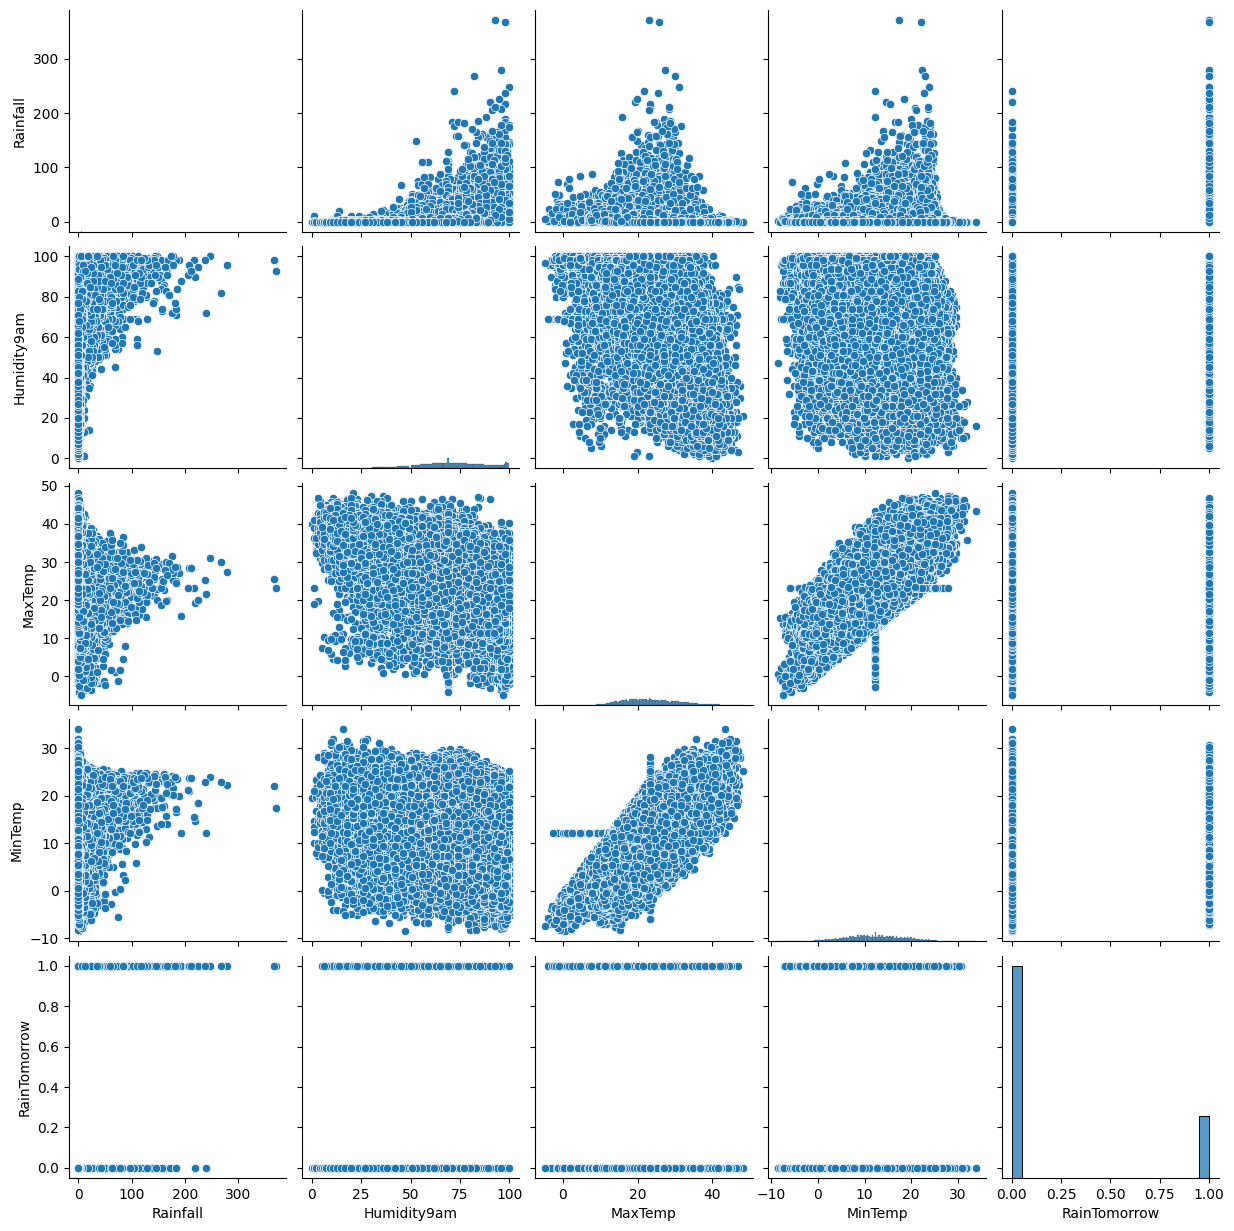

In [9]:
# Pairplot to explore relationships (for small datasets, you can reduce the number of variables)
sns.pairplot(df[['Rainfall', 'Humidity9am', 'MaxTemp', 'MinTemp', 'RainTomorrow']])
plt.show()

In [11]:
#!pip install statsmodels


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 18.6 MB/s eta 0:00:00


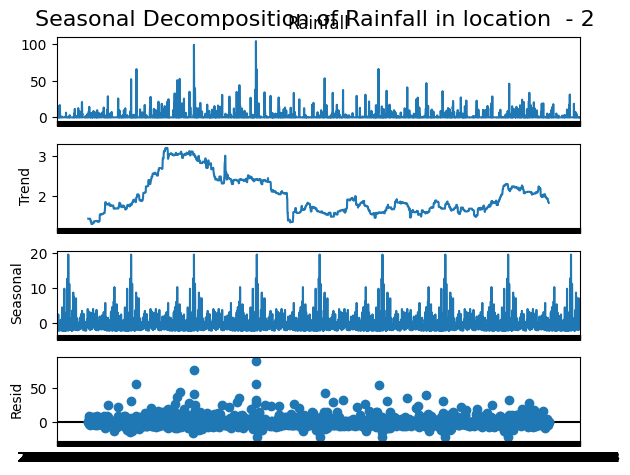

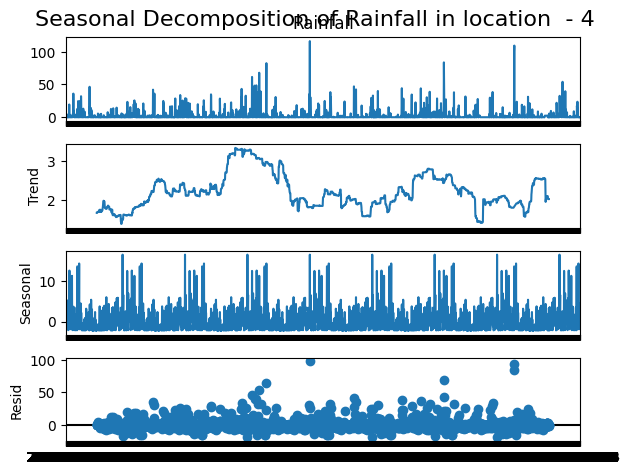

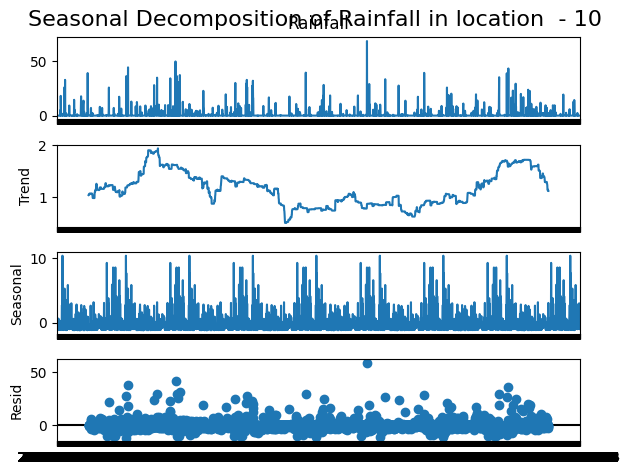

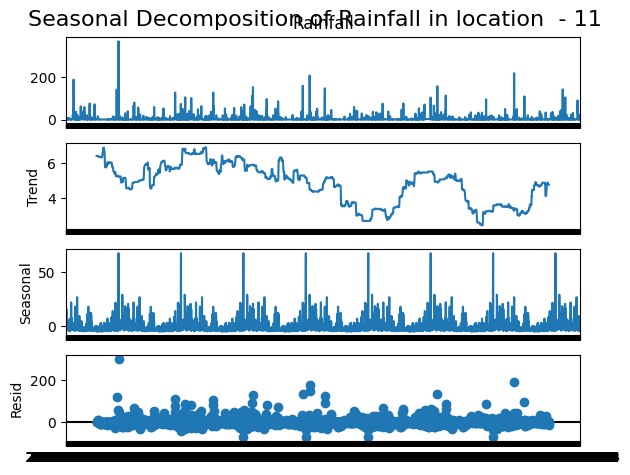

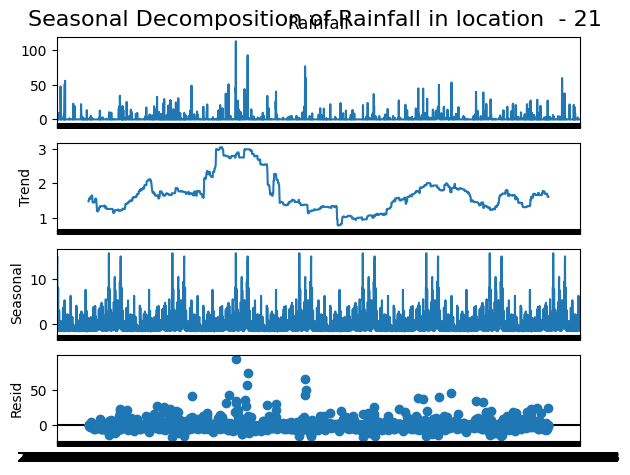

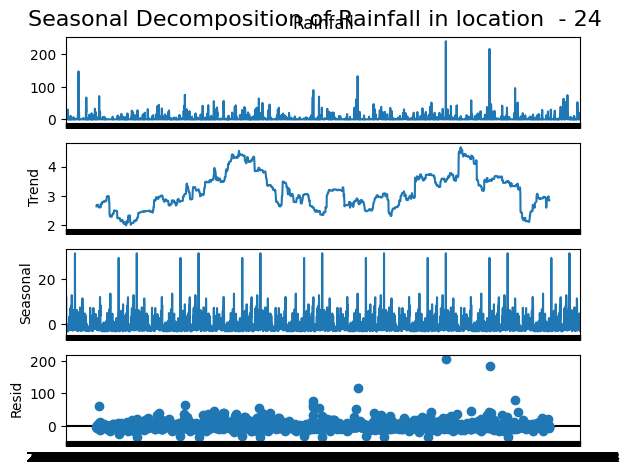

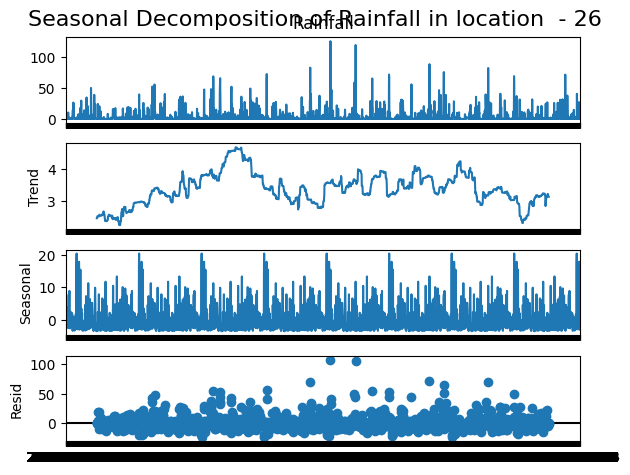

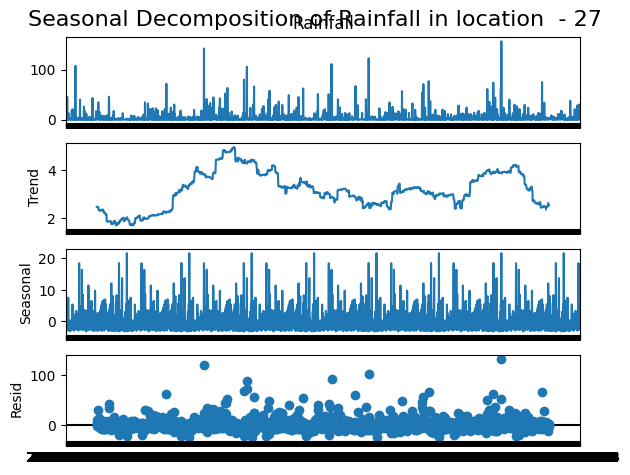

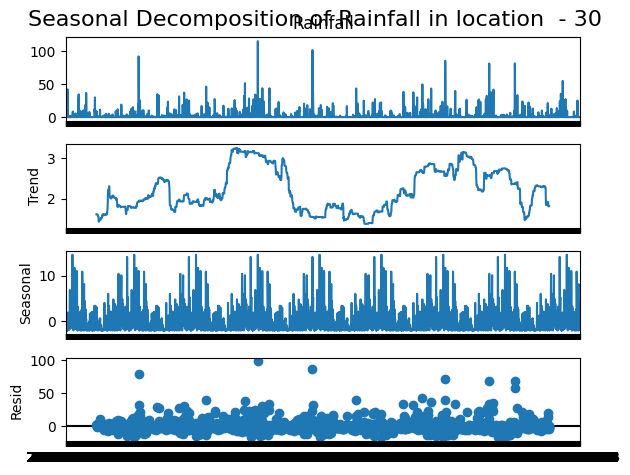

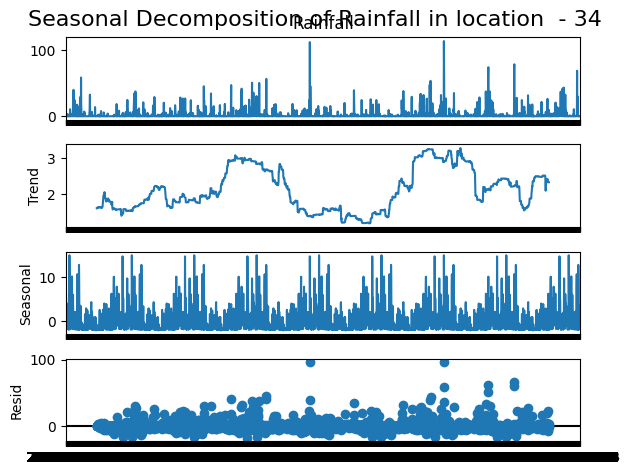

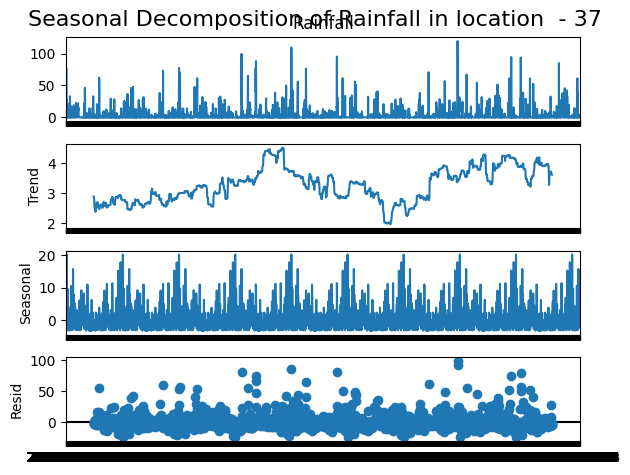

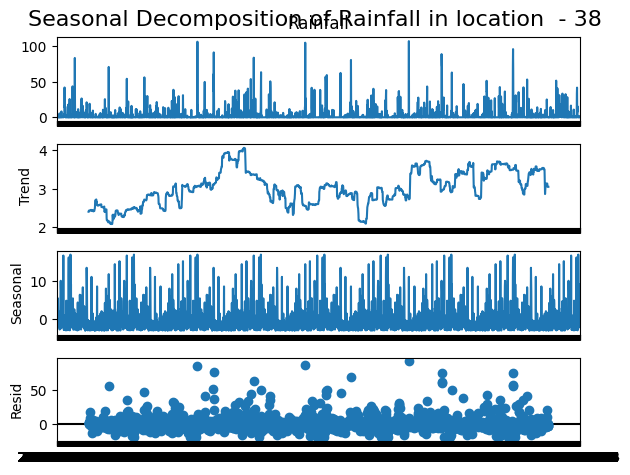

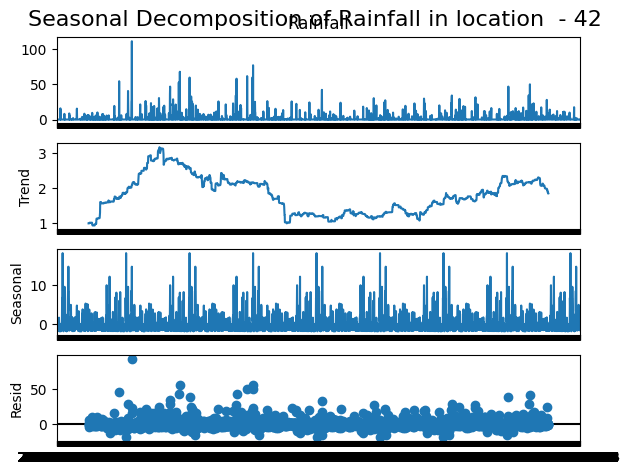

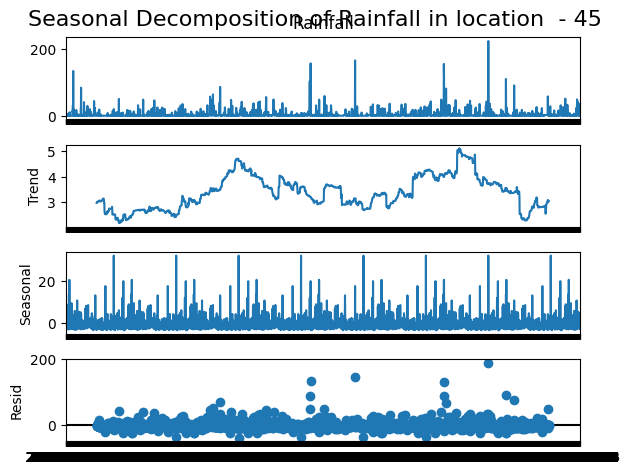

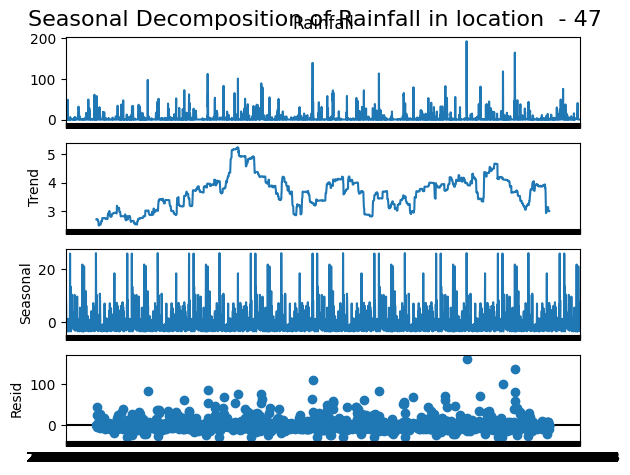

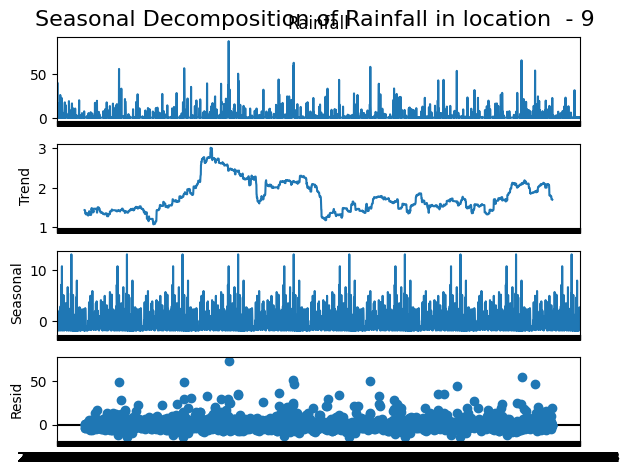

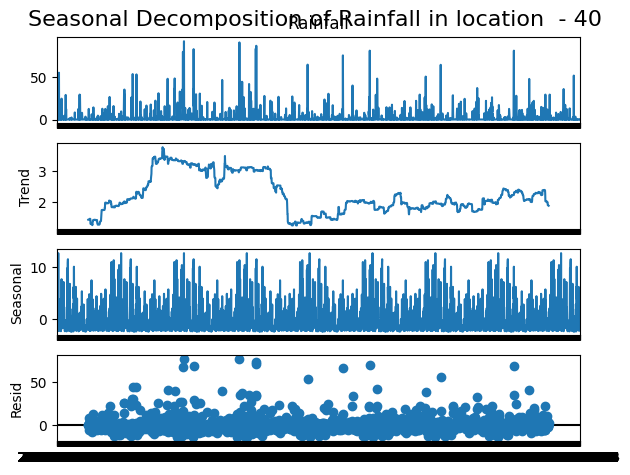

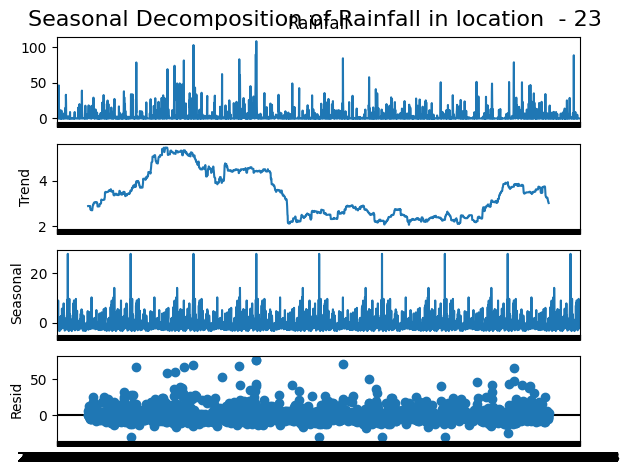

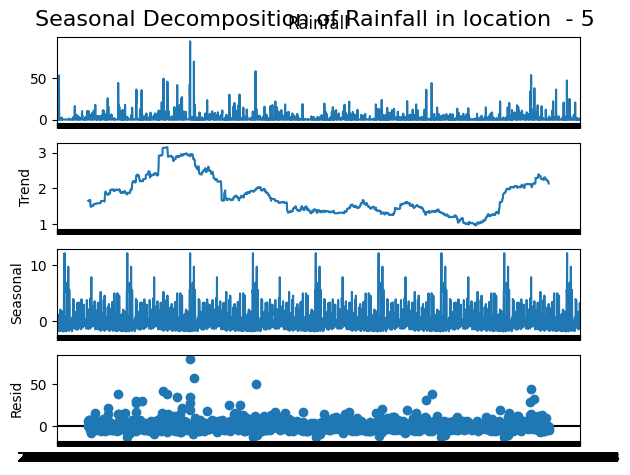

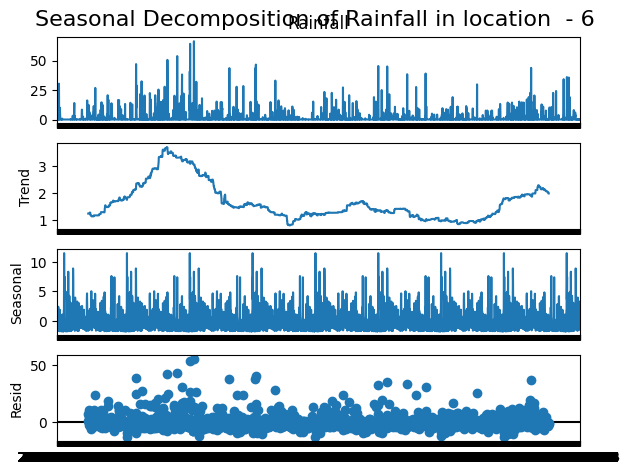

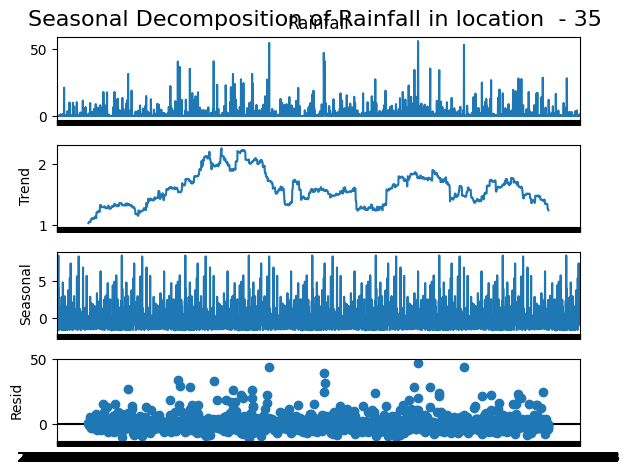

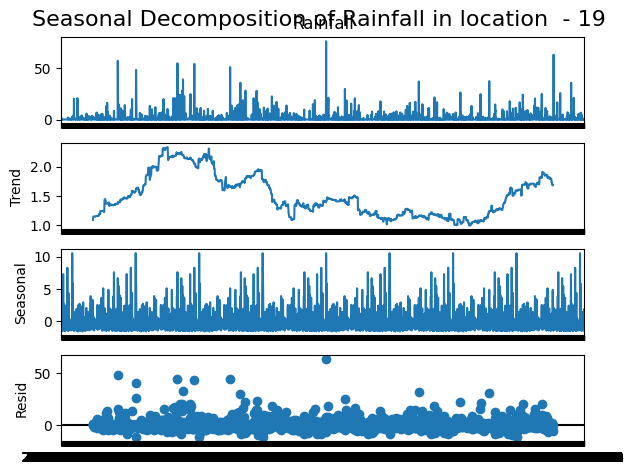

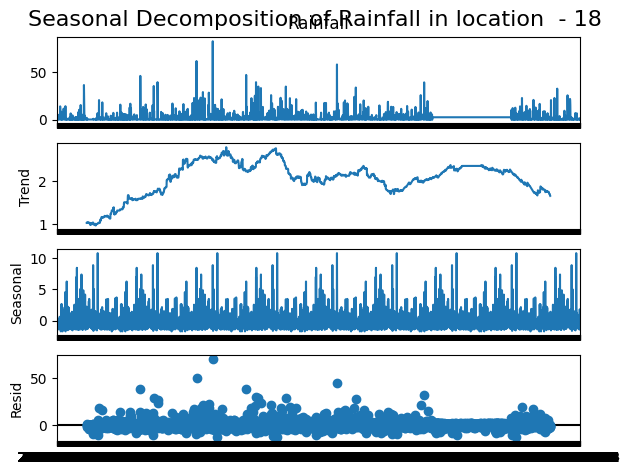

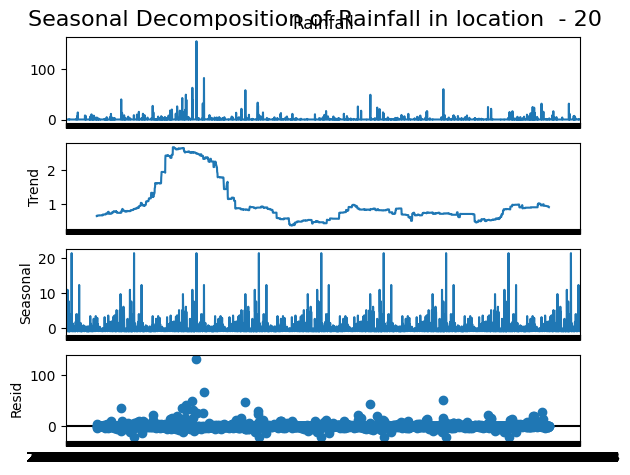

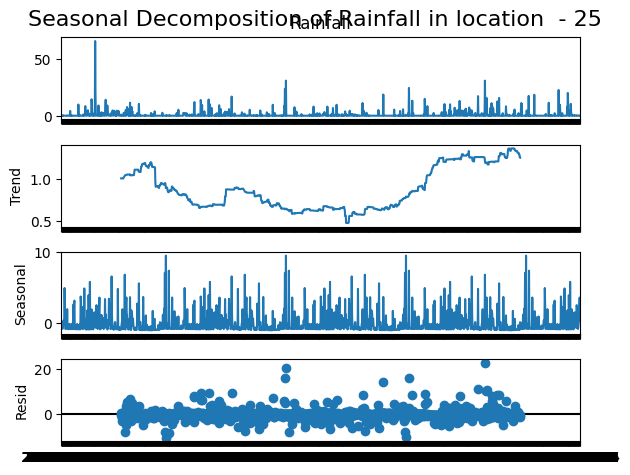

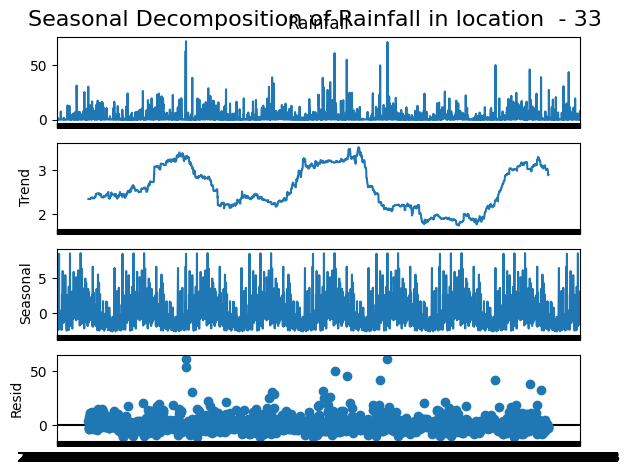

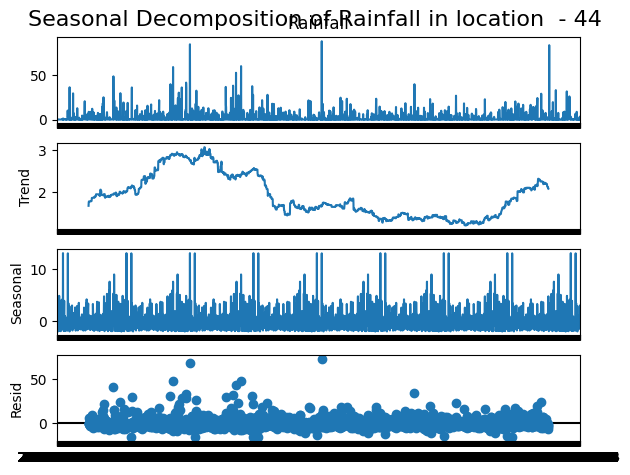

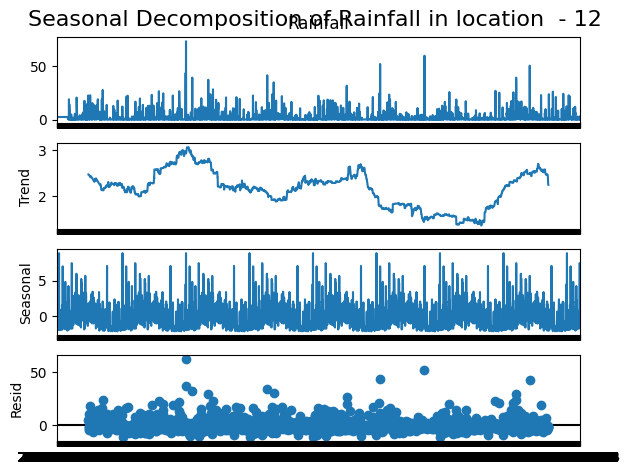

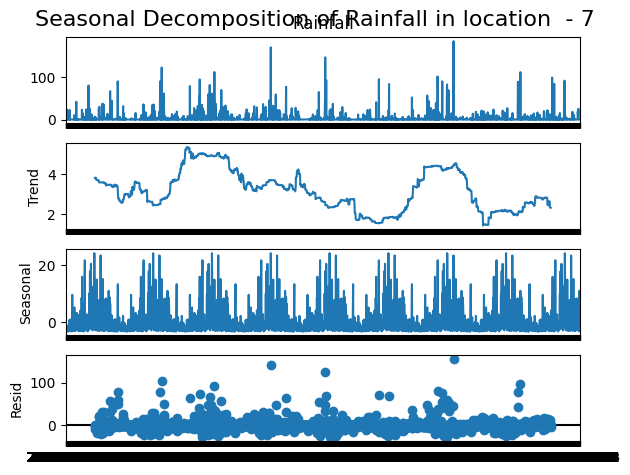

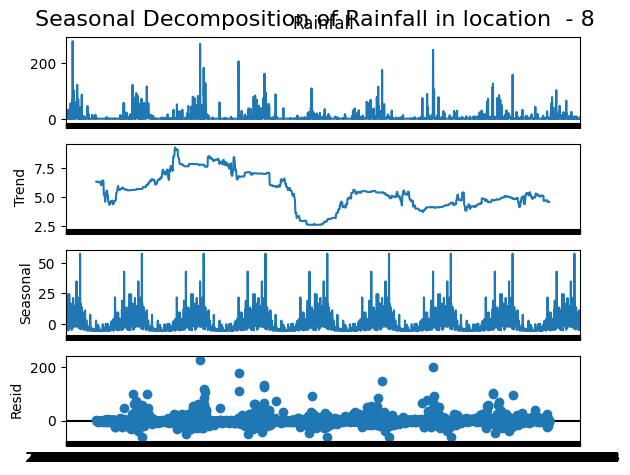

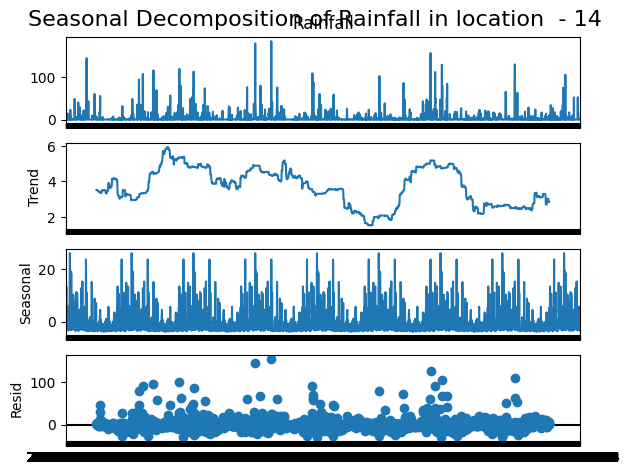

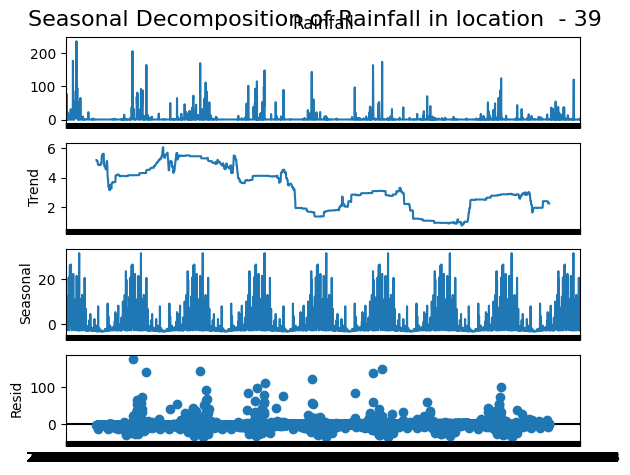

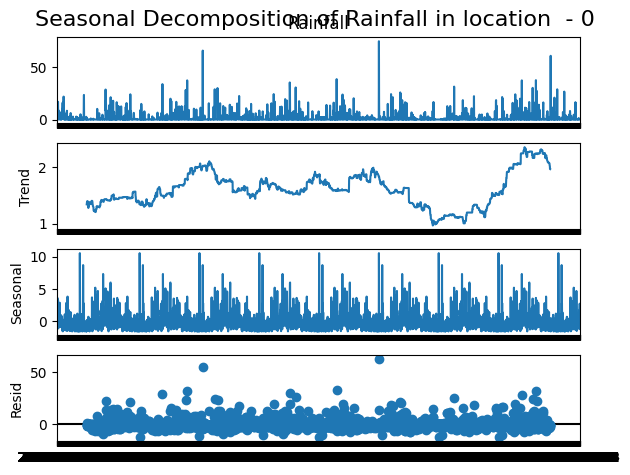

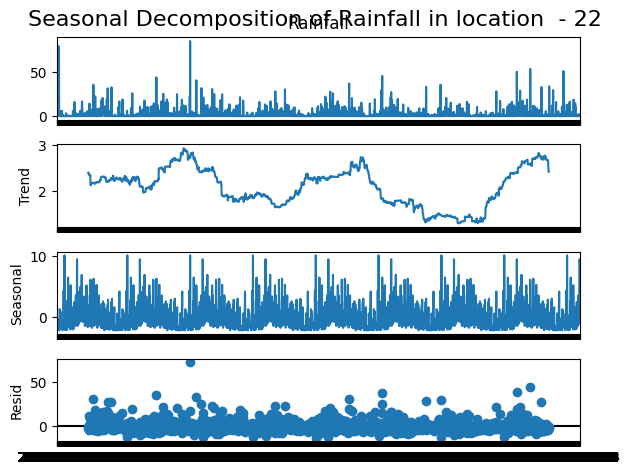

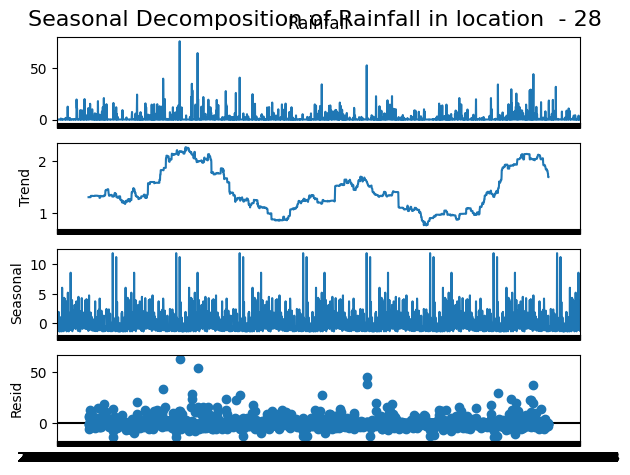

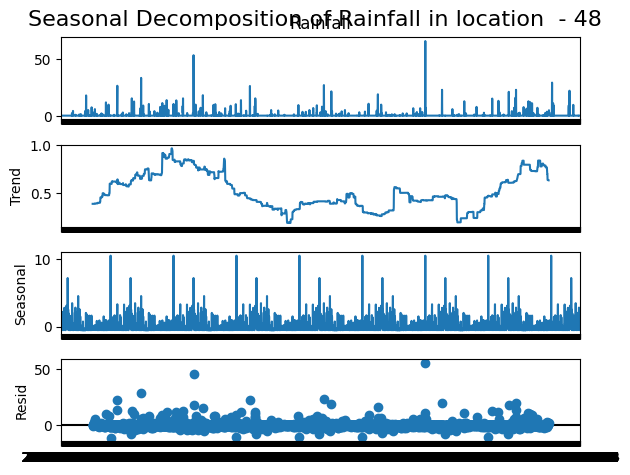

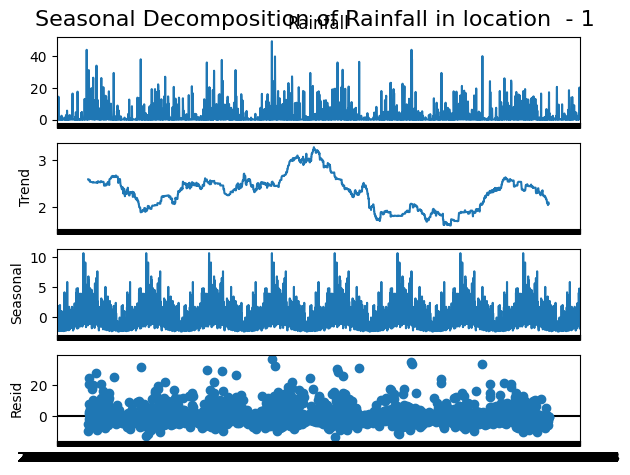

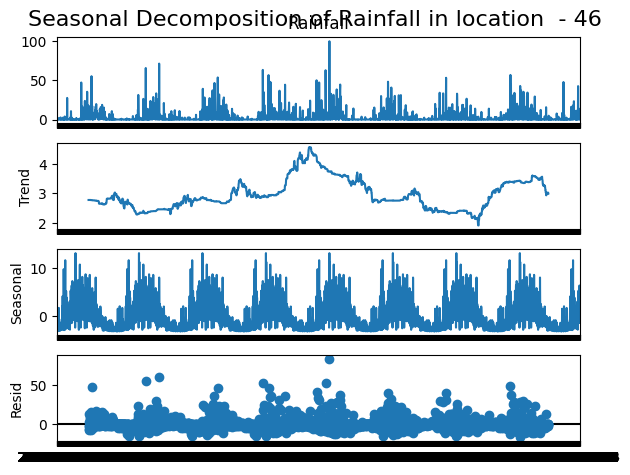

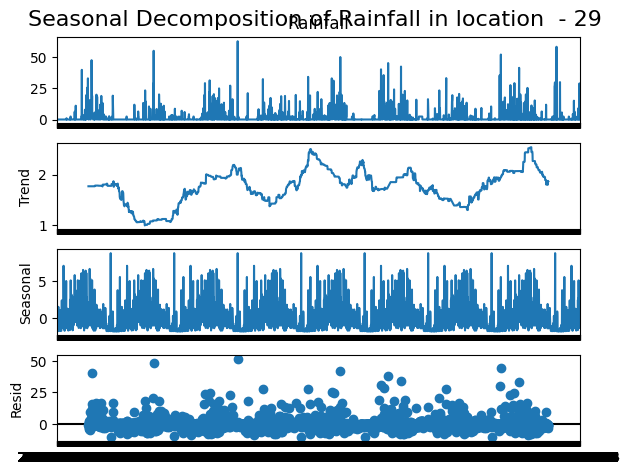

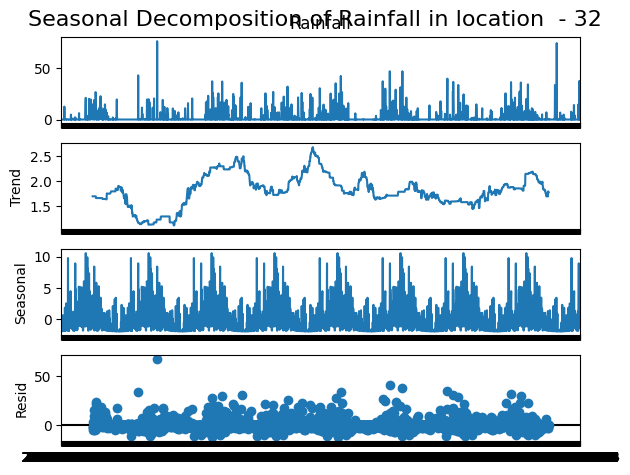

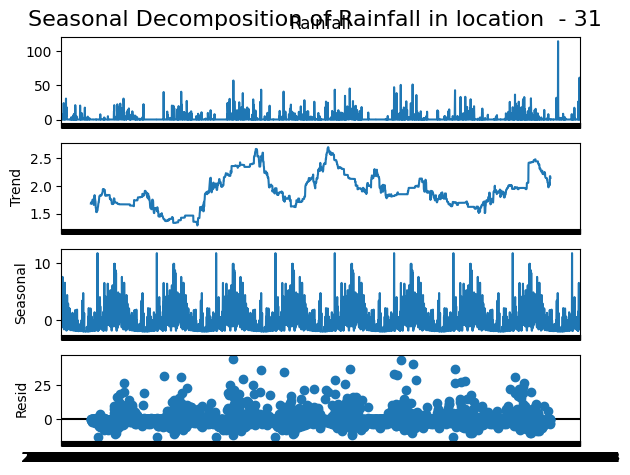

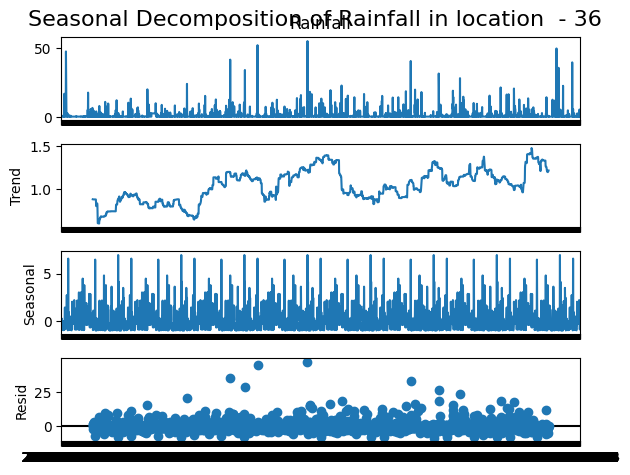

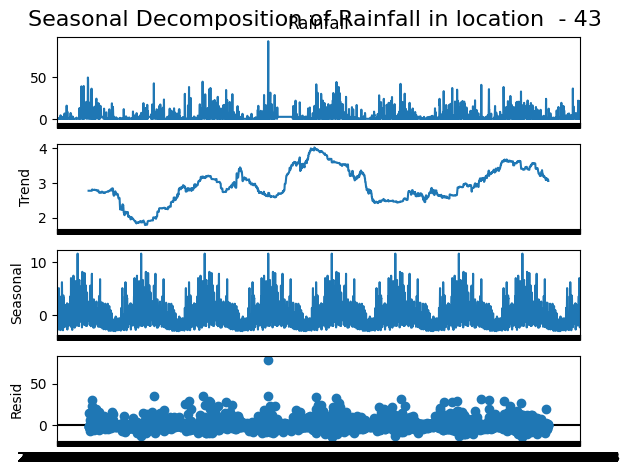

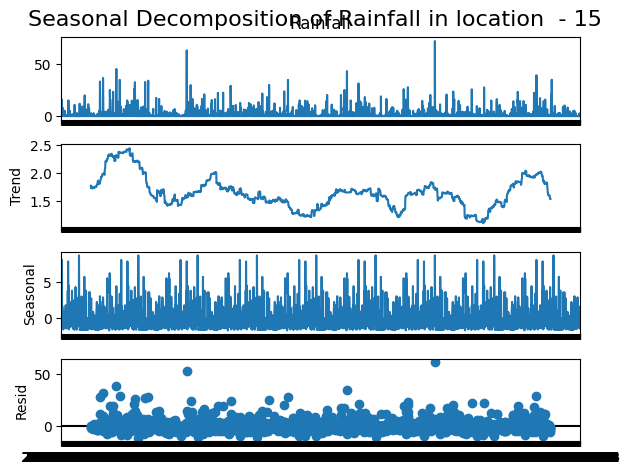

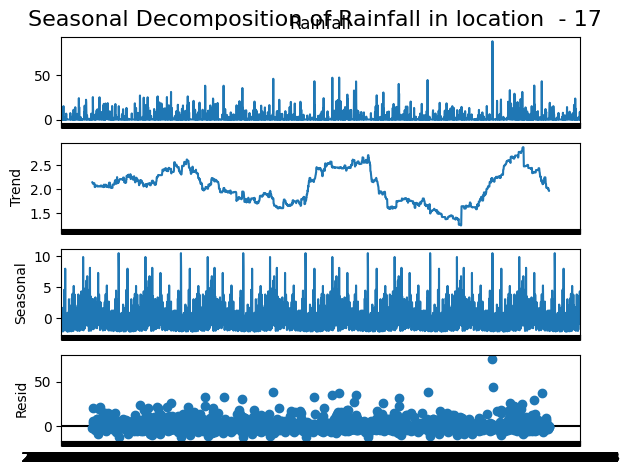

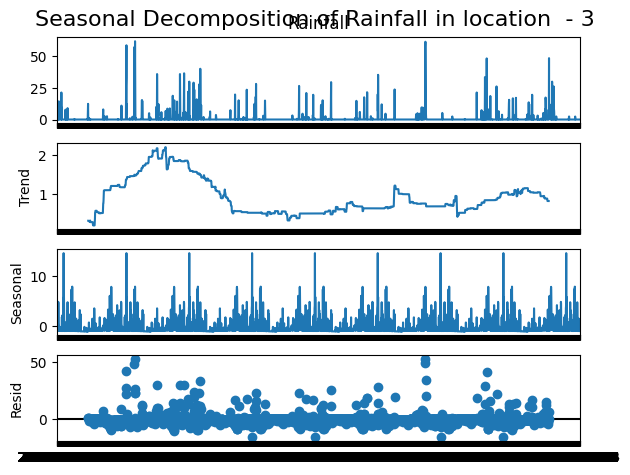

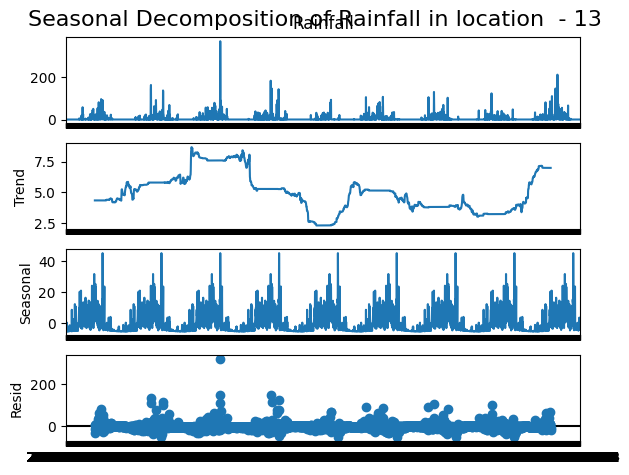

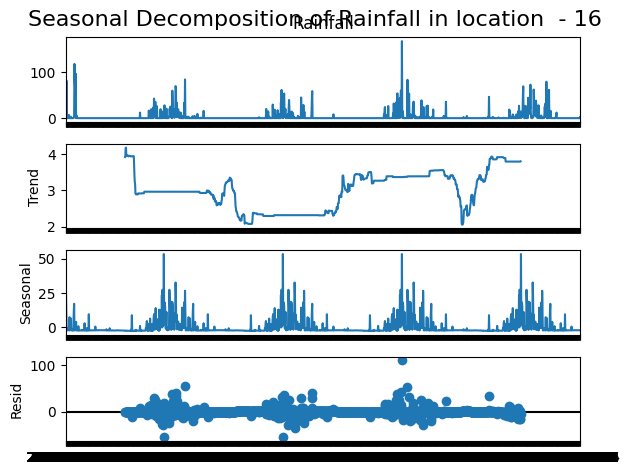

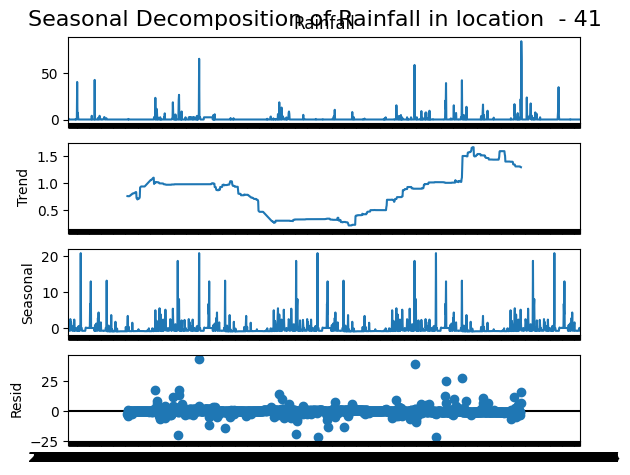

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Get unique locations
locations = df['Location'].unique()

# Loop through each location and perform seasonal decomposition
for location in locations:
    # Filter the data for the current location
    location_data = df[df['Location'] == location]

    # Ensure there is enough data for decomposition
    if len(location_data) >= 365:  # Ensure at least 1 year of data is available

        # Perform decomposition on the 'Rainfall' data for the current location
        decomposition = seasonal_decompose(location_data['Rainfall'], model='additive', period=365)

        # Plot the decomposition
        decomposition.plot()
        plt.suptitle(f'Seasonal Decomposition of Rainfall in location  - {location}', fontsize=16)
        plt.show()
    else:
        print(f"Not enough data for location: {location}")

In [13]:
# Descriptive statistics for each location
desc_stats = df.groupby('Location')['Rainfall'].describe()
print(desc_stats)


           count      mean        std  min  25%  50%       75%    max
Location                                                             
0         3193.0  1.591736   4.512985  0.0  0.0  0.0  1.000000   75.2
1         3040.0  2.264626   5.091389  0.0  0.0  0.0  2.000000   49.4
2         3040.0  1.918377   6.200369  0.0  0.0  0.0  0.400000  104.2
3         3040.0  0.886739   4.459152  0.0  0.0  0.0  0.000000   62.0
4         3009.0  2.197619   7.283394  0.0  0.0  0.0  0.600000  116.0
5         3040.0  1.742477   5.111401  0.0  0.0  0.0  1.200000   95.0
6         3040.0  1.620844   5.180069  0.0  0.0  0.0  0.400000   66.4
7         3193.0  3.137034  11.500065  0.0  0.0  0.0  0.800000  182.6
8         3040.0  5.684200  18.129202  0.0  0.0  0.0  2.600000  278.4
9         3436.0  1.744964   5.708641  0.0  0.0  0.0  0.200000   87.0
10        3009.0  1.135919   4.389516  0.0  0.0  0.0  0.000000   68.0
11        3009.0  5.011237  17.285190  0.0  0.0  0.0  2.360918  371.0
12        3009.0  2.

In [15]:
from statsmodels.tsa.stattools import adfuller

# Function to test stationarity for each location
def stationarity_test(location_data):
    result = adfuller(location_data.dropna())  # Drop missing values for test
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] < 0.05:
        print("Stationary")
    else:
        print("Non-Stationary")

# Test stationarity for each location
for location in locations:
    print(f"\nLocation: {location}")
    location_data = df[df['Location'] == location]['Rainfall']
    stationarity_test(location_data)


Location: 2
ADF Statistic: -25.17586648304226
p-value: 0.0
Stationary

Location: 4
ADF Statistic: -41.01367521179875
p-value: 0.0
Stationary

Location: 10
ADF Statistic: -27.65220537331371
p-value: 0.0
Stationary

Location: 11
ADF Statistic: -38.786234779328225
p-value: 0.0
Stationary

Location: 21
ADF Statistic: -23.140784446331057
p-value: 0.0
Stationary

Location: 24
ADF Statistic: -27.522495629403867
p-value: 0.0
Stationary

Location: 26
ADF Statistic: -20.580005824266518
p-value: 0.0
Stationary

Location: 27
ADF Statistic: -46.33672575160794
p-value: 0.0
Stationary

Location: 30
ADF Statistic: -15.342732720146973
p-value: 3.811819931770667e-28
Stationary

Location: 34
ADF Statistic: -38.7856178051848
p-value: 0.0
Stationary

Location: 37
ADF Statistic: -40.95362211152378
p-value: 0.0
Stationary

Location: 38
ADF Statistic: -39.65059894725933
p-value: 0.0
Stationary

Location: 42
ADF Statistic: -27.16808287331488
p-value: 0.0
Stationary

Location: 45
ADF Statistic: -19.33710142621

In [17]:
#!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.4 MB/s eta 0:00:00


In [18]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [19]:

file_path = '/content/Rain_data.csv'
rain_data = pd.read_csv(file_path)

# Convert 'Date' to datetime and sort the data by 'Date' and 'Location'
rain_data['Date'] = pd.to_datetime(rain_data['Date'])
rain_data = rain_data.sort_values(by=['Location', 'Date'])

rain_data['Year'] = rain_data['Date'].dt.year
rain_data['Month'] = rain_data['Date'].dt.month
rain_data['Day'] = rain_data['Date'].dt.day

In [20]:
# Split train (e.g., 80%) and test (e.g., 20%) based on time order
split_point = int(len(rain_data) * 0.8)
train_val_data = rain_data.iloc[:split_point]
test_data = rain_data.iloc[split_point:]



In [21]:

# Select columns for creating lag features
columns_to_lag = ['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'RainToday']
lag_values = [1, 3, 7]

In [22]:
def create_lag_features(data, cols, lags):
    for col in cols:
        for lag in lags:
            data[f'{col}_lag{lag}'] = data.groupby('Location')[col].shift(lag)
    return data

# Create lag features for the train/validation set
train_val_data = create_lag_features(train_val_data, columns_to_lag, lag_values)
train_val_data = train_val_data.dropna()

# Create lag features for the test set
test_data = create_lag_features(test_data, columns_to_lag, lag_values)
test_data = test_data.dropna()

In [23]:
# Split features and target
X_train_val = train_val_data.drop(columns=['RainTomorrow', 'Date'])
y_train_val = train_val_data['RainTomorrow']

X_test = test_data.drop(columns=['RainTomorrow', 'Date'])
y_test = test_data['RainTomorrow']

# Ensure the test set columns match the training set
X_test = X_test[X_train_val.columns]

# Create the XGBoost model
xgb_model = xgb.XGBClassifier()


In [24]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Perform time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Perform grid search with time series split
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='accuracy', cv=tscv, verbose=1)

# Fit the model on training/validation data
grid_search.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, im...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [25]:
best_model = grid_search.best_estimator_
test_predictions = best_model.predict(X_test)
test_probs = best_model.predict_proba(X_test)[:, 1]

# Print the best parameters and corresponding score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, test_predictions))


Best Parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Score:  0.8300584009509537
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.90     22644
           1       0.74      0.42      0.54      6371

    accuracy                           0.84     29015
   macro avg       0.80      0.69      0.72     29015
weighted avg       0.83      0.84      0.82     29015



ROC AUC Score: 0.8448116813204019


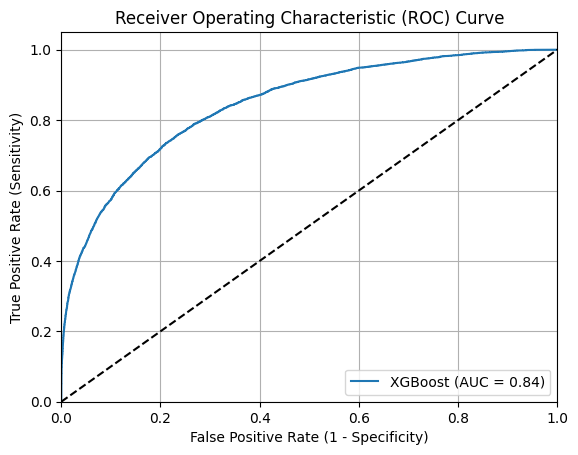

In [26]:
roc_auc = roc_auc_score(y_test, test_probs)
print('ROC AUC Score:', roc_auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, test_probs)
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random chance line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


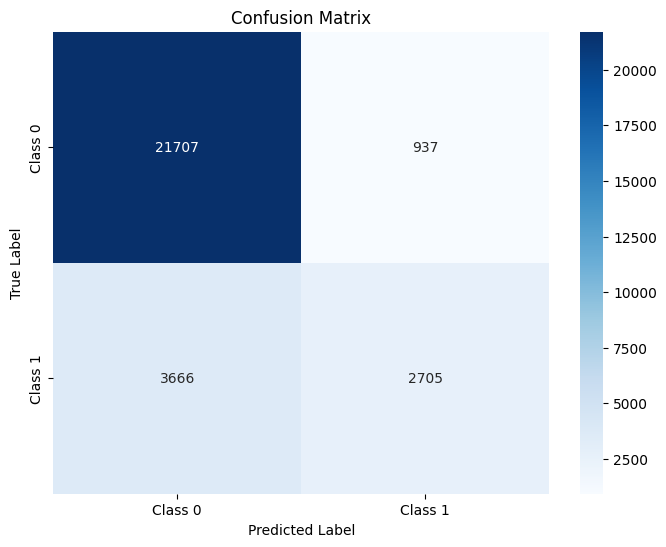

In [27]:
from sklearn.metrics import confusion_matrix


y_true = y_test
y_pred = test_predictions
# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap with seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()